<a href="https://colab.research.google.com/github/MickeyMamba/Class-1/blob/master/FM_9528_Banking_Analytics_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FiveYearData.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,33,34,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,int_rt,channel,ppmt_pnlty,prod_type,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,5.250,R,N,FRM,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NaN,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,4.125,R,N,FRM,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,NaN,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,2,F114Q1000004,742,201403,9,204402,NaN,0,1,P,78,45,139000,78,4.750,R,N,FRM,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,4.625,R,N,FRM,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,NaN,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,4,F114Q1000010,667,201403,N,204402,NaN,25,1,P,90,30,99000,90,5.125,R,N,FRM,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,4.625,C,N,FRM,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098589,2098589,F118Q4244555,666,201907,N,204906,NaN,12,1,P,85,37,136000,85,5.750,R,N,FRM,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,NaN,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,4.000,R,N,FRM,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,3.625,R,N,FRM,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


In [ ]:
raw_data.dtypes

In [ ]:
raw_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,1.888545e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098588e+06,2.098593e+06,2.098593e+06,2.098571e+06,51231.000000,5.123100e+04,51231.000000,51231.000000,8214.000000,8214.000000,51231.000000,51231.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049296e+06,7.502470e+02,2.016245e+05,2.043050e+05,3.031519e+04,6.512533e+00,1.032146e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00,2.016079e+05,201746.754777,1.754599e+05,21.653393,315.379516,4.750061,201711.443024,4.309421,10.432894,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058118e+05,9.749856e+01,1.359074e+02,6.170604e+02,1.123562e+04,1.168785e+01,2.498917e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976084e+04,7.158170e+01,4.999995e-01,1.321742e+02,109.126148,1.303255e+05,13.044376,62.279917,2.161952,134.645792,0.504538,417.375424,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,1.018000e+04,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000e+00,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246480e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.943000e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,8.000000e+04,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049296e+06,7.580000e+02,2.016090e+05,2.046010e+05,3.170000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,1.579210e+05,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573944e+06,7.870000e+02,2.017100e+05,2.047060e+05,4.006000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,2.630000e+05,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,9.999000e+03,2.019080e+05,2.060020e+05,4.974000e+04,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,1.198000e+06,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247

In [ ]:
raw_data.columns

Index(['Unnamed: 0', 'id_loan', 'fico', 'dt_first_pi', 'flag_fthb', 'dt_matr',
       'cd_msa', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb',
       'ltv', 'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st',
       'prop_type', 'zipcode', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'dt_orig', 'svcg_cycle',
       'current_upb', 'delq_sts', 'loan_age', 'mths_remng', 'repch_flag',
       'flag_mod', 'cd_zero_bal', 'dt_zero_bal', 'current_int_rt',
       'non_int_brng_upb', 'dt_lst_pi', 'mi_recoveries', 'net_sale_proceeds',
       'non_mi_recoveries', 'expenses', 'legal_costs', 'maint_pres_costs',
       'taxes_ins_costs', 'misc_costs', 'actual_loss', 'modcost',
       'stepmod_ind', 'dpm_ind', 'eltv', 'zb_removal_upb', 'dlq_acrd_int',
       'Default'],
      dtype='object')

In [ ]:
raw_data.isnull().any()

In [ ]:
null_columns = raw_data.columns[raw_data.isnull().any()]
raw_data[null_columns].isnull().sum()

cd_msa                210048
ppmt_pnlty              1307
zipcode                    5
flag_sc              2011435
dt_orig                   22
svcg_cycle           2047362
current_upb          2047362
delq_sts             2047362
loan_age             2047362
mths_remng           2047362
repch_flag           2090377
flag_mod             2098446
cd_zero_bal          2090379
dt_zero_bal          2090379
current_int_rt       2047362
non_int_brng_upb     2047362
dt_lst_pi            2096221
mi_recoveries        2098574
net_sale_proceeds    2098574
non_mi_recoveries    2098574
expenses             2098574
legal_costs          2098574
maint_pres_costs     2098574
taxes_ins_costs      2098574
misc_costs           2098574
actual_loss          2098574
modcost              2089059
stepmod_ind          2098446
dpm_ind              2098446
eltv                 2076471
zb_removal_upb       2090379
dlq_acrd_int         2098574
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
raw_data.dtypes

In [ ]:
# Identify the numerical columns
numeric_cols = raw_data.select_dtypes(include=[np.number]).columns
numeric_cols 

Index(['Unnamed: 0', 'fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'zipcode',
       'orig_loan_term', 'cnt_borr', 'dt_orig', 'svcg_cycle', 'current_upb',
       'loan_age', 'mths_remng', 'cd_zero_bal', 'dt_zero_bal',
       'current_int_rt', 'non_int_brng_upb', 'dt_lst_pi', 'mi_recoveries',
       'net_sale_proceeds', 'non_mi_recoveries', 'expenses', 'legal_costs',
       'maint_pres_costs', 'taxes_ins_costs', 'misc_costs', 'actual_loss',
       'modcost', 'eltv', 'zb_removal_upb', 'dlq_acrd_int'],
      dtype='object')

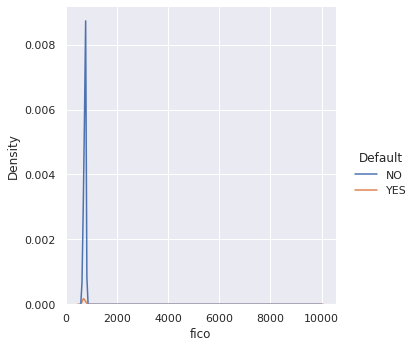

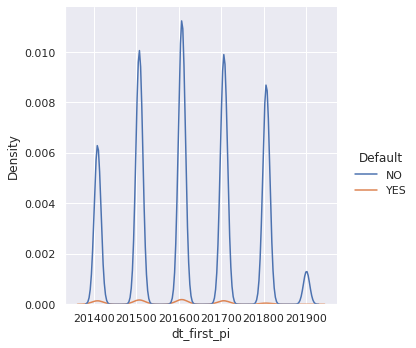

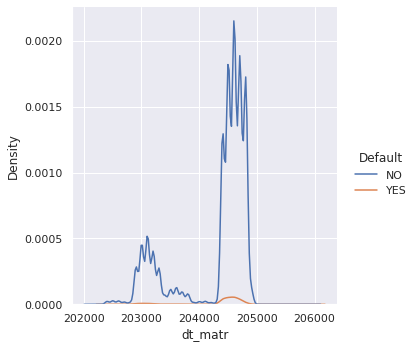

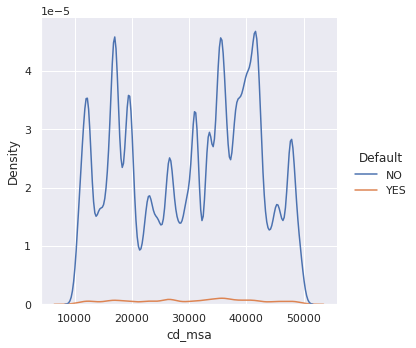

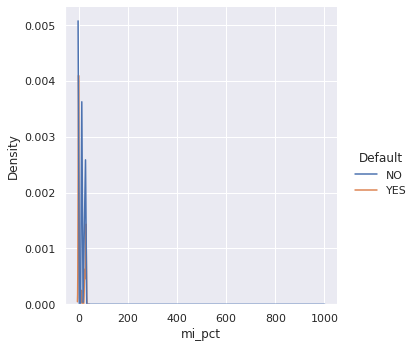

In [ ]:
sns.set(color_codes=True)

for col_id in raw_data.columns[np.r_[2,3,5:8]]:
    sns.displot(data = raw_data, x = col_id, hue = "Default", kind = 'kde')

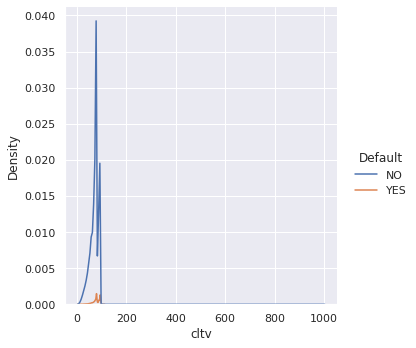

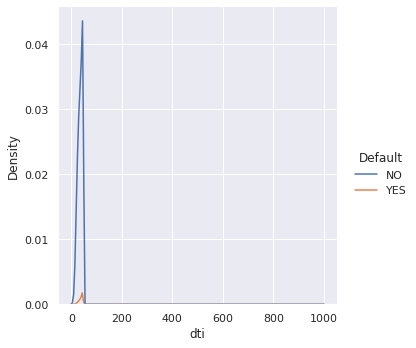

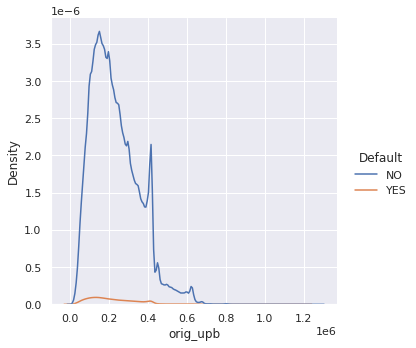

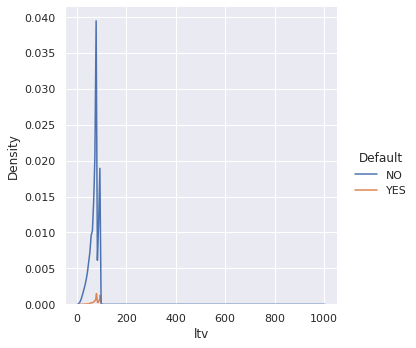

In [ ]:
sns.set(color_codes=True)

for col_id in raw_data.columns[np.r_[10:14]]:
    sns.displot(data = raw_data, x = col_id, hue = "Default", kind = 'kde')

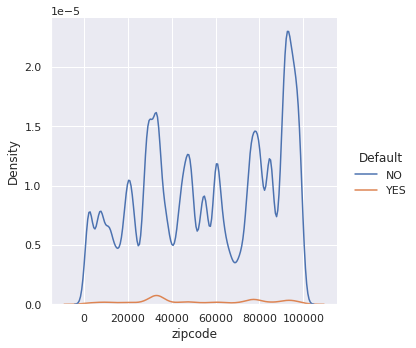

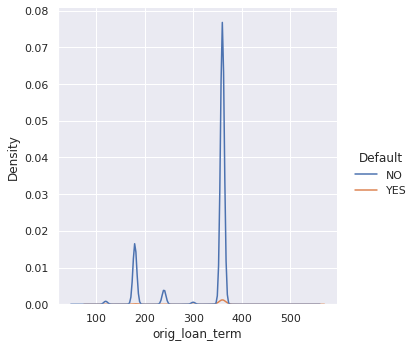

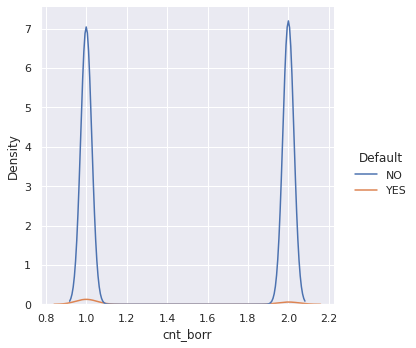

In [ ]:
sns.set(color_codes=True)

for col_id in raw_data.columns[np.r_[20,22,23]]:
    sns.displot(data = raw_data, x = col_id, hue = "Default", kind = 'kde')

In [5]:
bankloan_data = raw_data
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,1.888545e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098588e+06,2.098593e+06,2.098593e+06,2.098571e+06,51231.000000,5.123100e+04,51231.000000,51231.000000,8214.000000,8214.000000,51231.000000,51231.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049296e+06,7.502470e+02,2.016245e+05,2.043050e+05,3.031519e+04,6.512533e+00,1.032146e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00,2.016079e+05,201746.754777,1.754599e+05,21.653393,315.379516,4.750061,201711.443024,4.309421,10.432894,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058118e+05,9.749856e+01,1.359074e+02,6.170604e+02,1.123562e+04,1.168785e+01,2.498917e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976084e+04,7.158170e+01,4.999995e-01,1.321742e+02,109.126148,1.303255e+05,13.044376,62.279917,2.161952,134.645792,0.504538,417.375424,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,1.018000e+04,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000e+00,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246480e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.943000e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,8.000000e+04,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049296e+06,7.580000e+02,2.016090e+05,2.046010e+05,3.170000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,1.579210e+05,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573944e+06,7.870000e+02,2.017100e+05,2.047060e+05,4.006000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,2.630000e+05,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,9.999000e+03,2.019080e+05,2.060020e+05,4.974000e+04,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,1.198000e+06,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247

In [8]:
bankloan_data.fico.median()

758.0

In [6]:
# Credit score: since the vaild value of 9999 means not available (the score is smaller than 301 or bigger than 850), and the percentage of the not available values is quite small (far more less than 1 percent in total), to clean the data, we here replace the 9999 values by the median for the variable..
bankloan_data.fico.values[bankloan_data.fico.values == 9999] = 758

In [10]:
bankloan_data.fico.describe()

count    2.098593e+06
mean     7.494412e+02
std      4.523465e+01
min      5.170000e+02
25%      7.170000e+02
50%      7.580000e+02
75%      7.870000e+02
max      8.450000e+02
Name: fico, dtype: float64

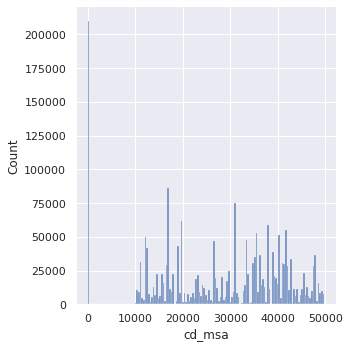

In [ ]:
fig = sns.displot(bankloan_data['cd_msa'], kind = 'hist')
plt.show()

In [7]:
#Metropolitan Statistical Area or Metropolitan Division: Since there are 210048 Space(5) in the data and these data meaning neither MSA nor Metropolitan Division are shown as null, these values are replaced with 00000
bankloan_data.cd_msa.fillna(value = 00000, inplace=True)
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098588e+06,2.098593e+06,2.098593e+06,2.098571e+06,51231.000000,5.123100e+04,51231.000000,51231.000000,8214.000000,8214.000000,51231.000000,51231.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049296e+06,7.494412e+02,2.016245e+05,2.043050e+05,2.728094e+04,6.512533e+00,1.032146e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00,2.016079e+05,201746.754777,1.754599e+05,21.653393,315.379516,4.750061,201711.443024,4.309421,10.432894,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058118e+05,4.523465e+01,1.359074e+02,6.170604e+02,1.401360e+04,1.168785e+01,2.498917e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976084e+04,7.158170e+01,4.999995e-01,1.321742e+02,109.126148,1.303255e+05,13.044376,62.279917,2.161952,134.645792,0.504538,417.375424,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000e+00,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246480e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,8.000000e+04,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049296e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,1.579210e+05,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573944e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,2.630000e+05,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,1.198000e+06,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247

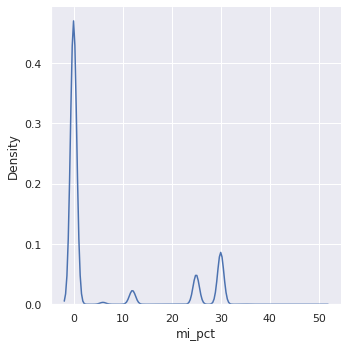

In [ ]:
sns.displot(bankloan_data['mi_pct'], kind = 'kde')

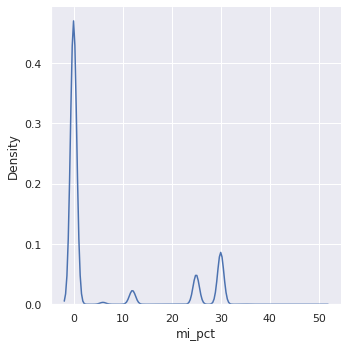

In [ ]:
sns.displot(raw_data['mi_pct'], kind = 'kde')

In [12]:
bankloan_data.mi_pct.median()

0.0

In [8]:
#Mortgage Insurance Percentage: Since 999 means not available and the percentage is less than 1 percent, we here replace the 999 vlaues by the median for the variable
bankloan_data.mi_pct.values[bankloan_data.mi_pct.values == 999] = 0.0

In [14]:
raw_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098588e+06,2.098593e+06,2.098593e+06,2.098571e+06,51231.000000,5.123100e+04,51231.000000,51231.000000,8214.000000,8214.000000,51231.000000,51231.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049296e+06,7.494412e+02,2.016245e+05,2.043050e+05,2.728094e+04,6.510629e+00,1.032146e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00,2.016079e+05,201746.754777,1.754599e+05,21.653393,315.379516,4.750061,201711.443024,4.309421,10.432894,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058118e+05,4.523465e+01,1.359074e+02,6.170604e+02,1.401360e+04,1.160726e+01,2.498917e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976084e+04,7.158170e+01,4.999995e-01,1.321742e+02,109.126148,1.303255e+05,13.044376,62.279917,2.161952,134.645792,0.504538,417.375424,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000e+00,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246480e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,8.000000e+04,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049296e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,1.579210e+05,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573944e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,2.630000e+05,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,5.000000e+01,9.900000e+01,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,1.198000e+06,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247

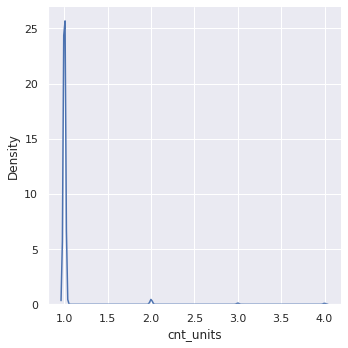

In [ ]:
sns.displot(bankloan_data['cnt_units'], kind = 'kde')

In [15]:
bankloan_data.cnt_units.median()

1.0

In [9]:
#Number of Units: Since 99 means not available and the percentage is less than 1 percent, we here replace the 99 values by the median for the variable
bankloan_data.cnt_units.values[bankloan_data.cnt_units.values == 99] = 1.0
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098588e+06,2.098593e+06,2.098593e+06,2.098571e+06,51231.000000,5.123100e+04,51231.000000,51231.000000,8214.000000,8214.000000,51231.000000,51231.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049296e+06,7.494412e+02,2.016245e+05,2.043050e+05,2.728094e+04,6.510629e+00,1.032099e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00,2.016079e+05,201746.754777,1.754599e+05,21.653393,315.379516,4.750061,201711.443024,4.309421,10.432894,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058118e+05,4.523465e+01,1.359074e+02,6.170604e+02,1.401360e+04,1.160726e+01,2.405670e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976084e+04,7.158170e+01,4.999995e-01,1.321742e+02,109.126148,1.303255e+05,13.044376,62.279917,2.161952,134.645792,0.504538,417.375424,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000e+00,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246480e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,8.000000e+04,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049296e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,1.579210e+05,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573944e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,2.630000e+05,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,5.000000e+01,4.000000e+00,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,1.198000e+06,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247

In [17]:
bankloan_data.cltv.median()

80.0

In [10]:
#Original Combined Loan-to-Value (CLTV): Since 999 means not available and the percentage is less than 1 percent, we here replace the 999 values by the median for the variable
bankloan_data.cltv.values[bankloan_data.cltv.values == 999] = 80.0

In [19]:
bankloan_data.dti.median()

36.0

In [11]:
#Original Debt-to-Income Ratio: Since 999 means not available and the percentage is less than 1 percent, we here replace the 999 values by the median for the variable
bankloan_data.dti.values[bankloan_data.dti.values == 999] = 36.0

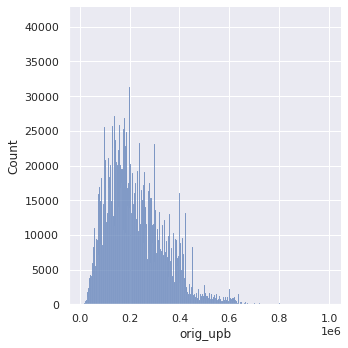

In [ ]:
fig = sns.displot(bankloan_data['orig_upb'], kind = 'hist')
plt.show()

In [21]:
bankloan_data.orig_upb.describe()

count    2.098593e+06
mean     2.331565e+05
std      1.209287e+05
min      6.000000e+03
25%      1.400000e+05
50%      2.100000e+05
75%      3.090000e+05
max      1.285000e+06
Name: orig_upb, dtype: float64

In [12]:
bankloan_data = bankloan_data.loc[(bankloan_data['orig_upb'] < 1000000)]
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098536e+06,2.098541e+06,2.098541e+06,2.098519e+06,51227.000000,51227.000000,51227.000000,51227.000000,8214.000000,8214.000000,51227.000000,51227.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049292e+06,7.494409e+02,2.016245e+05,2.043050e+05,2.728083e+04,6.510791e+00,1.032027e+00,7.433990e+01,3.445172e+01,2.331359e+05,7.393980e+01,4.136932e+00,5.615330e+04,3.226547e+02,1.500762e+00,2.016079e+05,201746.748082,175388.051960,21.653913,315.377203,4.750061,201711.443024,4.309379,10.433708,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058108e+05,4.523488e+01,1.359073e+02,6.170645e+02,1.401362e+04,1.160736e+01,2.401306e-01,1.648807e+01,9.403980e+00,1.208587e+05,1.716955e+01,5.628143e-01,2.976057e+04,7.158228e+01,4.999995e-01,1.321739e+02,109.125485,130074.251706,13.044607,62.281768,2.161952,134.645792,0.504535,417.391709,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246470e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,80000.000000,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049290e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,157907.410000,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573936e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,263000.000000,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,5.000000e+01,4.000000e+00,1.210000e+02,5.100000e+01,9.990000e+05,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,951540.200000,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,24

In [23]:
bankloan_data.ltv.median()

79.0

In [13]:
#Original Loan-to- Value (LTV): Since 999 means not available and the percentage is less than 1 percent, we here replace the 999 values by the median for the variable
bankloan_data.ltv.values[bankloan_data.ltv.values == 999] = 79.0
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098536e+06,2.098541e+06,2.098541e+06,2.098519e+06,51227.000000,51227.000000,51227.000000,51227.000000,8214.000000,8214.000000,51227.000000,51227.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049292e+06,7.494409e+02,2.016245e+05,2.043050e+05,2.728083e+04,6.510791e+00,1.032027e+00,7.433990e+01,3.445172e+01,2.331359e+05,7.391745e+01,4.136932e+00,5.615330e+04,3.226547e+02,1.500762e+00,2.016079e+05,201746.748082,175388.051960,21.653913,315.377203,4.750061,201711.443024,4.309379,10.433708,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058108e+05,4.523488e+01,1.359073e+02,6.170645e+02,1.401362e+04,1.160736e+01,2.401306e-01,1.648807e+01,9.403980e+00,1.208587e+05,1.655285e+01,5.628143e-01,2.976057e+04,7.158228e+01,4.999995e-01,1.321739e+02,109.125485,130074.251706,13.044607,62.281768,2.161952,134.645792,0.504535,417.391709,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246470e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,80000.000000,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049290e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,157907.410000,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573936e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,263000.000000,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,5.000000e+01,4.000000e+00,1.210000e+02,5.100000e+01,9.990000e+05,1.050000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,951540.200000,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,24

In [14]:
#Original Interest Rate: Since the original interest rate includes the price of the mortgage and is not predictive, we here drop the variable.
bankloan_data.drop(columns=['int_rt'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
bankloan_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,prod_type,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,FRM,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NaN,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,FRM,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,NaN,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,FRM,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,FRM,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,NaN,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,FRM,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,FRM,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,FRM,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,NaN,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FRM,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FRM,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


In [26]:
bankloan_data.ppmt_pnlty.mode()

0    N
dtype: object

In [15]:
#Prepayment Penalty Mortgage (PPM) Flag: Since there are 1307 null values, which is less than 1 percent of the number of total cases, we here replace the null with the mode of the variable.
bankloan_data.ppmt_pnlty.fillna(value = "N", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
null_columns2 = bankloan_data.columns[bankloan_data.isnull().any()]
bankloan_data[null_columns2].isnull().sum()

zipcode                    5
flag_sc              2011434
dt_orig                   22
svcg_cycle           2047314
current_upb          2047314
delq_sts             2047314
loan_age             2047314
mths_remng           2047314
repch_flag           2090325
flag_mod             2098394
cd_zero_bal          2090327
dt_zero_bal          2090327
current_int_rt       2047314
non_int_brng_upb     2047314
dt_lst_pi            2096169
mi_recoveries        2098522
net_sale_proceeds    2098522
non_mi_recoveries    2098522
expenses             2098522
legal_costs          2098522
maint_pres_costs     2098522
taxes_ins_costs      2098522
misc_costs           2098522
actual_loss          2098522
modcost              2089007
stepmod_ind          2098394
dpm_ind              2098394
eltv                 2076419
zb_removal_upb       2090327
dlq_acrd_int         2098522
dtype: int64

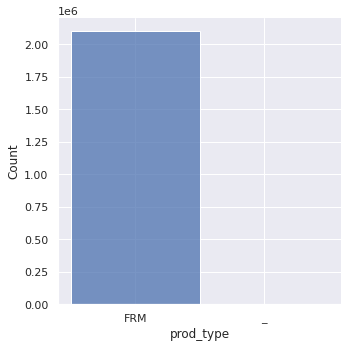

In [ ]:
fig = sns.displot(bankloan_data['prod_type'], kind = 'hist')
plt.show()

In [16]:
#Product Type: Since all mortgages are fixed rate mortgage, adding no prediction value, we here drop the variable.
bankloan_data.drop(columns=['prod_type'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
bankloan_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NaN,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,NaN,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,NaN,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,NaN,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,NaN,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,NaN,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


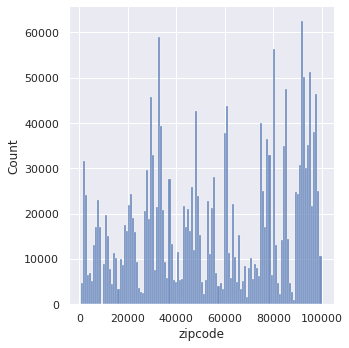

In [ ]:
fig = sns.displot(bankloan_data['zipcode'], kind = 'hist')
plt.show()

In [30]:
bankloan_data.zipcode.describe()

count    2.098536e+06
mean     5.615330e+04
std      2.976057e+04
min      6.000000e+02
25%      3.050000e+04
50%      5.540000e+04
75%      8.460000e+04
max      9.990000e+04
Name: zipcode, dtype: float64

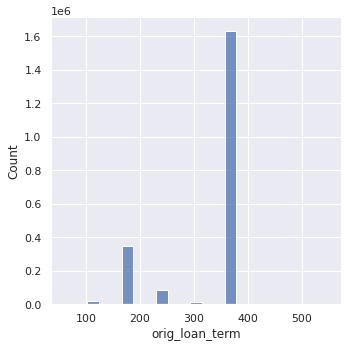

In [ ]:
fig = sns.displot(bankloan_data['orig_loan_term'], kind = 'hist')
plt.show()

In [ ]:
bankloan_data.orig_loan_term.describe()

count    2.098541e+06
mean     3.226547e+02
std      7.158228e+01
min      6.000000e+01
25%      3.600000e+02
50%      3.600000e+02
75%      3.600000e+02
max      5.490000e+02
Name: orig_loan_term, dtype: float64

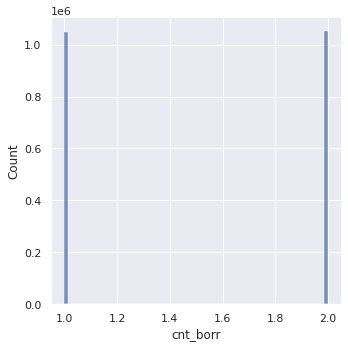

In [ ]:
fig = sns.displot(bankloan_data['cnt_borr'], kind = 'hist')
plt.show()

In [31]:
bankloan_data.cnt_borr.values[bankloan_data.cnt_borr.values == 99].sum()

0

In [18]:
#Super Conforming Flag: Since this is a binary variable, change “Yes” to 1 and Null to 0
bankloan_data.flag_sc.fillna(value = 0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [19]:
bankloan_data.flag_sc.replace("Yes", 1)

0          0
1          0
2          0
3          0
4          0
          ..
2098588    0
2098589    0
2098590    0
2098591    0
2098592    0
Name: flag_sc, Length: 2098541, dtype: object

In [20]:
bankloan_data.flag_sc.astype('str')

0          0
1          0
2          0
3          0
4          0
          ..
2098588    0
2098589    0
2098590    0
2098591    0
2098592    0
Name: flag_sc, Length: 2098541, dtype: object

In [21]:
bankloan_data.flag_sc.describe()

count     2098541
unique          2
top             0
freq      2011434
Name: flag_sc, dtype: int64

In [36]:
bankloan_data.describe()

,Unnamed: 0,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,zipcode,orig_loan_term,cnt_borr,dt_orig,svcg_cycle,current_upb,loan_age,mths_remng,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,eltv,zb_removal_upb,dlq_acrd_int
count,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098541e+06,2.098536e+06,2.098541e+06,2.098541e+06,2.098519e+06,51227.000000,51227.000000,51227.000000,51227.000000,8214.000000,8214.000000,51227.000000,51227.000000,2372.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,9534.000000,22122.000000,8214.000000,19.000000
mean,1.049292e+06,7.494409e+02,2.016245e+05,2.043050e+05,2.728083e+04,6.510791e+00,1.032027e+00,7.433990e+01,3.445172e+01,2.331359e+05,7.391745e+01,5.615330e+04,3.226547e+02,1.500762e+00,2.016079e+05,201746.748082,175388.051960,21.653913,315.377203,4.750061,201711.443024,4.309379,10.433708,201745.981029,22029.684211,189636.842105,1344.526316,15756.157895,-13.157895,-6.368421,412.315789,15363.368421,-9551.631579,0.189337,66.418430,220361.303067,1229.484211
std,6.058108e+05,4.523488e+01,1.359073e+02,6.170645e+02,1.401362e+04,1.160736e+01,2.401306e-01,1.648807e+01,9.403980e+00,1.208587e+05,1.655285e+01,2.976057e+04,7.158228e+01,4.999995e-01,1.321739e+02,109.125485,130074.251706,13.044607,62.281768,2.161952,134.645792,0.504535,417.391709,105.550634,23480.768034,115784.192025,1727.749126,57315.509733,39.412721,12.711371,2887.947523,57357.623586,18331.069343,7.022684,16.161514,134677.369138,1249.282201
min,0.000000e+00,5.170000e+02,2.014020e+05,2.021110e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,6.000000e+02,6.000000e+01,1.000000e+00,2.014010e+05,201405.000000,0.000000,0.000000,61.000000,1.000000,201405.000000,2.375000,0.000000,201405.000000,0.000000,0.000000,0.000000,-3009.000000,-125.000000,-42.000000,-2904.000000,-800.000000,-66061.000000,0.000000,0.000000,94.230000,0.000000
25%,5.246470e+05,7.170000e+02,2.015070e+05,2.044050e+05,1.697400e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.050000e+04,3.600000e+02,1.000000e+00,2.015050e+05,201706.000000,80000.000000,11.000000,322.000000,3.000000,201609.000000,4.000000,0.000000,201704.000000,0.000000,135900.000000,0.000000,-493.500000,0.000000,-6.500000,-308.500000,-210.000000,-10227.000000,0.000000,56.900000,115000.000000,0.000000
50%,1.049290e+06,7.580000e+02,2.016090e+05,2.046010e+05,2.982000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,5.540000e+04,3.600000e+02,2.000000e+00,2.016070e+05,201712.000000,157907.410000,20.000000,337.000000,6.000000,201710.000000,4.375000,0.000000,201801.000000,18087.000000,174100.000000,439.000000,-245.000000,0.000000,0.000000,0.000000,-105.000000,-1884.000000,0.000000,68.200000,191000.000000,1360.900000
75%,1.573936e+06,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,8.460000e+04,3.600000e+02,2.000000e+00,2.017080e+05,201810.000000,263000.000000,30.000000,348.000000,6.000000,201808.000000,4.625000,0.000000,201809.000000,34092.500000,288100.000000,2712.000000,-105.000000,0.000000,0.000000,0.000000,-105.000000,605.000000,0.000000,77.675000,305007.830000,2450.400000
max,2.098592e+06,8.450000e+02,2.019080e+05,2.060020e+05,4.974000e+04,5.000000e+01,4.000000e+00,1.210000e+02,5.100000e+01,9.990000e+05,1.050000e+02,9.990000e+04,5.490000e+02,2.000000e+00,2.018120e+05,201906.000000,951540.200000,64.000000,537.000000,6.000000,201906.000000,7.000000,84693.380000,201908.000000,71439.000000,378600.000000,4748.000000,247957.000000,0.000000,0.000000,11563.000000,247957.000000,2769.000000,488.100000,289.900000,975000.000000,3277.6

In [22]:
bankloan_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


In [38]:
bankloan_data.to_pickle('BankloanClean2.pkl')

In [39]:
bankloan_data.to_csv('BankloanClean2.csv')

In [ ]:
bankloan_data.to_pickle('BankloanClean.pkl')

In [ ]:
bankloan_data.to_csv('BankloanClean.csv')

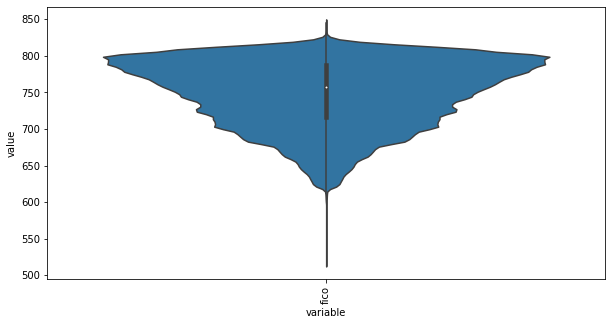

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[2]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

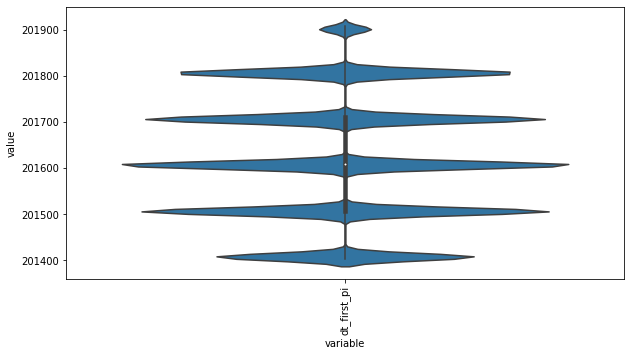

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[3]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[5:8]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[10:14]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [4]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp36-none-any.whl size=57827 sha256=e0f07bf0447d9c00e3ead0bf9c14522295b7f47fa9e2a4213b16384fee1d8e83
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [5]:
import scorecardpy as sc
import numpy as np

In [25]:
bankloan_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


In [26]:
bankloan_data.Default.replace({'NO': 0, 'YES': 1}, inplace=True)
bankloan_data

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,1
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [294]:
bankloan_data

,Unnamed: 0,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,svcg_cycle,current_upb,delq_sts,loan_age,mths_remng,repch_flag,flag_mod,cd_zero_bal,dt_zero_bal,current_int_rt,non_int_brng_upb,dt_lst_pi,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,201402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,201403.0,201803.0,0.0,3,47.0,313.0,N,NaN,1.0,201803.0,4.125,0.0,201712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,1
2,2,F114Q1000004,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,201403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,F114Q1000010,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,201401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,2098588,F118Q4244552,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098589,2098589,F118Q4244555,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,201812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098590,2098590,F118Q4244558,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2098591,2098591,F118Q4244561,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,201810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
bankloan_data.to_pickle('BankloanClean1123.pkl')

In [28]:
bankloan_dataB = bankloan_data.iloc[:,2:25]
bankloan_dataB 

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc
0,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0
1,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0
2,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0
3,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0
4,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0
2098589,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0
2098590,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0
2098591,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0


In [29]:
bankloan_dataB['Default'] = bankloan_data['Default']
bankloan_dataB

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Default
0,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,0
1,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,1
2,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,0
3,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,0
4,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,0
2098589,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,0
2098590,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,0
2098591,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,0


In [30]:
bankloan_data.to_pickle('BankloanCleanB1123.pkl')

In [175]:
bankloan_dataB.flag_fthb.astype('str')

0          9
1          Y
2          9
3          9
4          N
          ..
2098588    9
2098589    N
2098590    9
2098591    9
2098592    9
Name: flag_fthb, Length: 2098541, dtype: object

In [176]:
bankloan_data.occpy_sts.astype('str')

0          I
1          P
2          P
3          P
4          P
          ..
2098588    P
2098589    P
2098590    P
2098591    P
2098592    I
Name: occpy_sts, Length: 2098541, dtype: object

In [177]:
bankloan_dataB.channel.astype('str')

0          R
1          R
2          R
3          R
4          R
          ..
2098588    C
2098589    R
2098590    R
2098591    R
2098592    B
Name: channel, Length: 2098541, dtype: object

In [178]:
bankloan_dataB.loan_purpose.astype('str')

0          P
1          P
2          C
3          N
4          P
          ..
2098588    C
2098589    P
2098590    N
2098591    N
2098592    C
Name: loan_purpose, Length: 2098541, dtype: object

In [179]:
bankloan_dataB.flag_sc.astype('str')

0          0
1          0
2          0
3          0
4          0
          ..
2098588    0
2098589    0
2098590    0
2098591    0
2098592    0
Name: flag_sc, Length: 2098541, dtype: object

In [296]:
bankloan_dataB

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Default
0,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,0
1,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,1
2,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,0
3,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,0
4,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098588,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,0
2098589,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,0
2098590,798,201908,9,204907,29460.0,12,1,P,84,19,299000,84,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,0
2098591,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,0


In [31]:
train, test = sc.split_df(bankloan_dataB,
                        y = 'Default',
                          ratio = 0.7, seed = 251111952).values()

In [32]:
train

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Default
0,717,201404,9,204403,39300.0,0,1,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0,0
1,813,201405,Y,204404,19780.0,30,1,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,0,1
2,742,201403,9,204402,0.0,0,1,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0,0
3,735,201405,9,204404,33460.0,0,1,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0,0
4,667,201403,N,204402,0.0,25,1,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098584,779,201908,9,204907,29460.0,0,1,P,80,41,282000,80,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0,0
2098586,721,201906,9,204905,24340.0,0,1,P,54,42,200000,54,R,N,MI,SF,49400.0,N,360,2,Other sellers,Other servicers,0,0
2098587,747,201901,9,204812,38060.0,0,1,I,82,36,264000,47,C,N,AZ,PU,85200.0,N,360,1,"FLAGSTAR BANK, FSB",Other servicers,0,0
2098589,666,201907,N,204906,0.0,12,1,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0,0


In [33]:
test

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Default
11,780,201403,9,204402,30700.0,0,1,P,80,44,412000,80,B,N,NE,PU,68500.0,N,360,2,Other sellers,Other servicers,0,0
12,738,201403,N,204402,14540.0,0,1,P,50,23,200000,50,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,0
40,681,201403,9,204402,43300.0,0,1,P,80,43,292000,80,R,N,TX,SF,76200.0,C,360,2,Other sellers,Other servicers,0,0
41,757,201403,9,204402,43300.0,0,1,P,77,28,261000,77,R,N,TX,SF,76200.0,N,360,2,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0,0
42,780,201403,9,204402,0.0,0,1,P,65,17,80000,65,R,N,MO,SF,65400.0,C,360,1,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098583,792,201902,N,203401,26420.0,0,1,P,80,42,184000,80,C,N,TX,SF,77500.0,P,180,1,"TEXAS CAPITAL BANK, N.A.",Other servicers,0,0
2098585,755,201908,N,204907,29620.0,30,1,P,95,34,267000,95,R,N,MI,SF,48800.0,P,360,2,Other sellers,Other servicers,0,0
2098588,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,0
2098591,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,0


In [34]:
train.to_pickle('train1123.pkl')

In [35]:
test.to_pickle('test1123.pkl')

In [6]:
import pandas as pd
train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/train1123.pkl')

In [7]:
train1 = train.iloc[:,0:3] 
train1['Default'] = train['Default']
train1

,fico,dt_first_pi,flag_fthb,Default
0,717,201404,9,0
1,813,201405,Y,1
2,742,201403,9,0
3,735,201405,9,0
4,667,201403,N,0
...,...,...,...,...
2098584,779,201908,9,0
2098586,721,201906,9,0
2098587,747,201901,9,0
2098589,666,201907,N,0


In [8]:
bins1 = sc.woebin(train1, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1468979 rows and 4 columns in 00:00:25


In [9]:
bins1

{'dt_first_pi':       variable                  bin  ...    breaks  is_special_values
 0  dt_first_pi      [-inf,201420.0)  ...  201420.0              False
 1  dt_first_pi  [201420.0,201710.0)  ...  201710.0              False
 2  dt_first_pi  [201710.0,201810.0)  ...  201810.0              False
 3  dt_first_pi       [201810.0,inf)  ...       inf              False
 
 [4 rows x 12 columns],
 'fico':   variable            bin   count  ...  total_iv  breaks  is_special_values
 0     fico   [-inf,690.0)  174769  ...  0.713996   690.0              False
 1     fico  [690.0,735.0)  336019  ...  0.713996   735.0              False
 2     fico  [735.0,760.0)  243573  ...  0.713996   760.0              False
 3     fico  [760.0,780.0)  243804  ...  0.713996   780.0              False
 4     fico    [780.0,inf)  470814  ...  0.713996     inf              False
 
 [5 rows x 12 columns],
 'flag_fthb':     variable bin   count  ...  total_iv  breaks  is_special_values
 0  flag_fthb   9  789188  

In [10]:
train2 = train.iloc[:,3:5] 
train2['Default'] = train['Default']
train2

,dt_matr,cd_msa,Default
0,204403,39300.0,0
1,204404,19780.0,1
2,204402,0.0,0
3,204404,33460.0,0
4,204402,0.0,0
...,...,...,...
2098584,204907,29460.0,0
2098586,204905,24340.0,0
2098587,204812,38060.0,0
2098589,204906,0.0,0


In [11]:
bins2 = sc.woebin(train2, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1468979 rows and 3 columns in 00:00:26


In [12]:
bins2

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'dt_matr':   variable                  bin   count  ...  total_iv    breaks  is_special_values
 0  dt_matr      [-inf,204320.0)  326728  ...  0.201033  204320.0              False
 1  dt_matr  [204320.0,204420.0)  167121  ...  0.201033  204420.0              False
 2  dt_matr  [204420.0,204710.0)  681147  

In [13]:
bins = bins1
bins.update(bins2)
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'dt_first_pi':       variable                  bin  ...    breaks  is_special_values
 0  dt_first_pi      [-inf,201420.0)  ...  201420.0              False
 1  dt_first_pi  [201420.0,201710.0)  ...  201710.0              False
 2  dt_first_pi  [201710.0,201810.0)  ...  201810.0              False
 3  dt_fi

{'cd_msa': <Figure size 432x288 with 2 Axes>,
 'dt_first_pi': <Figure size 432x288 with 2 Axes>,
 'dt_matr': <Figure size 432x288 with 2 Axes>,
 'fico': <Figure size 432x288 with 2 Axes>,
 'flag_fthb': <Figure size 432x288 with 2 Axes>}

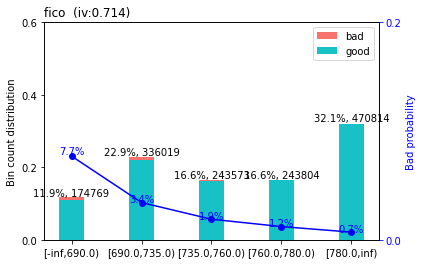

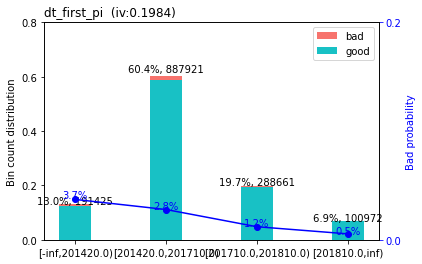

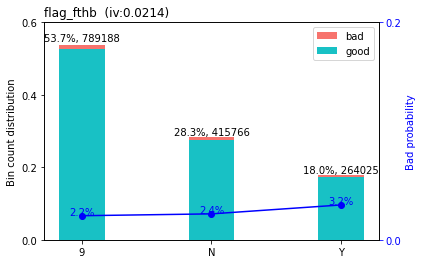

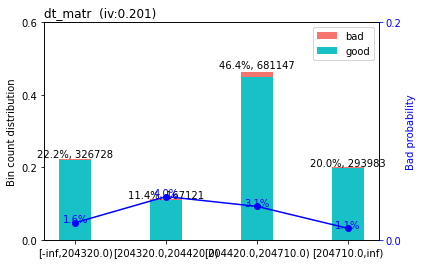

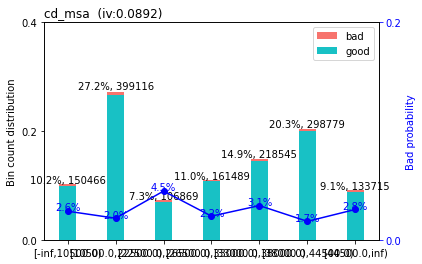

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

-------- 1/5 fico --------
>>> dt[fico].describe(): 
count    1.468979e+06
mean     7.494427e+02
std      4.523170e+01
min      5.170000e+02
25%      7.170000e+02
50%      7.580000e+02
75%      7.870000e+02
max      8.390000e+02
Name: fico, dtype: float64 



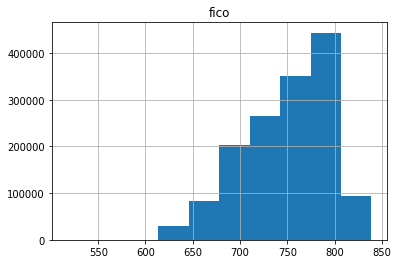

>>> Current breaks:
690.0,735.0,760.0,780.0 



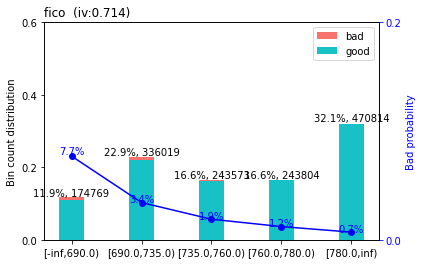

>>> Adjust breaks for (1/5) fico?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/5 dt_first_pi --------
>>> dt[dt_first_pi].describe(): 
count    1.468979e+06
mean     2.016245e+05
std      1.358651e+02
min      2.014020e+05
25%      2.015070e+05
50%      2.016090e+05
75%      2.017100e+05
max      2.019080e+05
Name: dt_first_pi, dtype: float64 



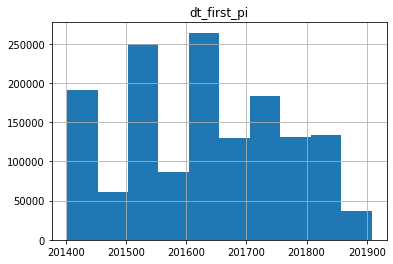

>>> Current breaks:
201420.0,201710.0,201810.0 



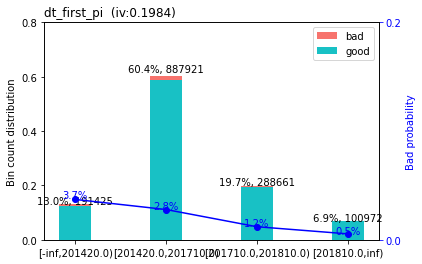

>>> Adjust breaks for (2/5) dt_first_pi?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/5 flag_fthb --------
>>> dt[flag_fthb].describe(): 
count     1468979
unique          3
top             9
freq       789188
Name: flag_fthb, dtype: object 

>>> dt[flag_fthb].value_counts(): 
9    789188
N    415766
Y    264025
Name: flag_fthb, dtype: int64 

>>> Current breaks:
'9','N','Y' 



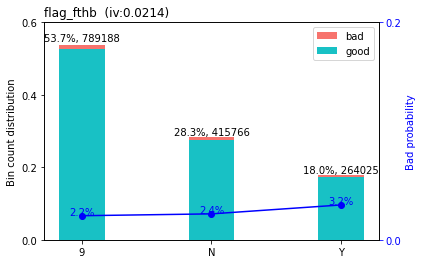

>>> Adjust breaks for (3/5) flag_fthb?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/5 dt_matr --------
>>> dt[dt_matr].describe(): 
count    1.468979e+06
mean     2.043047e+05
std      6.172860e+02
min      2.022020e+05
25%      2.044050e+05
50%      2.046010e+05
75%      2.047060e+05
max      2.060020e+05
Name: dt_matr, dtype: float64 



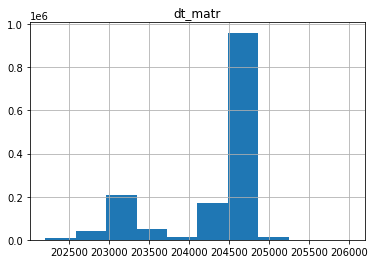

>>> Current breaks:
204320.0,204420.0,204710.0 



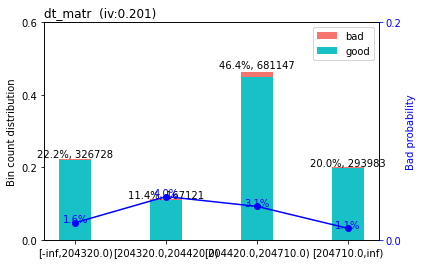

>>> Adjust breaks for (4/5) dt_matr?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 204520.0, 204710.0
[INFO] creating woe binning ...
Binning on 1468979 rows and 2 columns in 00:00:12
>>> Current breaks:
204520.0, 204710.0 



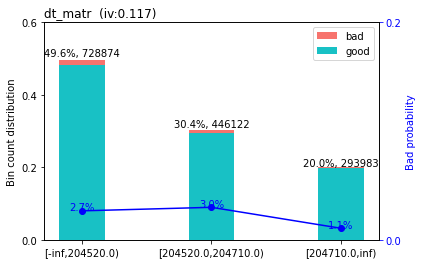

>>> Adjust breaks for (4/5) dt_matr?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 204700,204710
[INFO] creating woe binning ...
Binning on 1468979 rows and 2 columns in 00:00:11
>>> Current breaks:
204700.0, 204710.0 



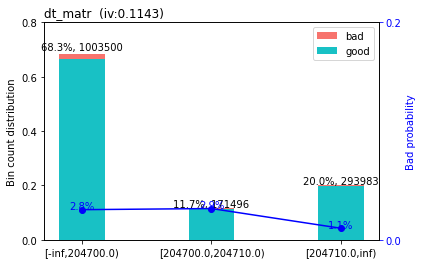

>>> Adjust breaks for (4/5) dt_matr?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 204705,204710
[INFO] creating woe binning ...
Binning on 1468979 rows and 2 columns in 00:00:11
>>> Current breaks:
204705.0, 204710.0 



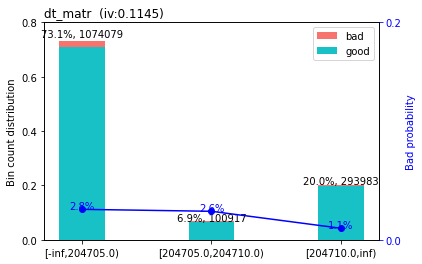

>>> Adjust breaks for (4/5) dt_matr?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/5 cd_msa --------
>>> dt[cd_msa].describe(): 
count    1.468979e+06
mean     2.728061e+04
std      1.401194e+04
min      0.000000e+00
25%      1.697400e+04
50%      2.982000e+04
75%      3.894000e+04
max      4.974000e+04
Name: cd_msa, dtype: float64 



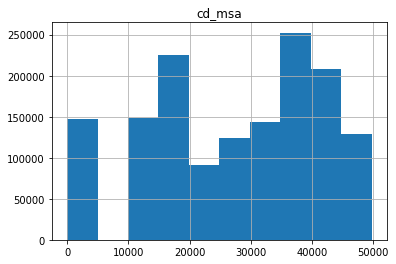

>>> Current breaks:
10500.0,22500.0,26500.0,33000.0,38000.0,44500.0 



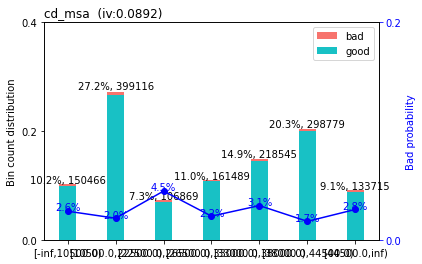

>>> Adjust breaks for (5/5) cd_msa?
1: next 
2: yes 
3: back
Selection: 1


In [216]:
breaks_adj = sc.woebin_adj(train, "Default", bins, adj_all_var = True)

In [217]:
breaks_adj

"{'cd_msa': [10500.0,22500.0,26500.0,33000.0,38000.0,44500.0], 'dt_first_pi': [201420.0,201710.0,201810.0], 'dt_matr': [204705,204710], 'fico': [690.0,735.0,760.0,780.0], 'flag_fthb': ['9','N','Y']}"

In [14]:
train3 = train.iloc[:,5:10] 
train3['Default'] = train['Default']
train3

,mi_pct,cnt_units,occpy_sts,cltv,dti,Default
0,0,1,I,77,41,0
1,30,1,P,95,32,1
2,0,1,P,78,45,0
3,0,1,P,86,45,0
4,25,1,P,90,30,0
...,...,...,...,...,...,...
2098584,0,1,P,80,41,0
2098586,0,1,P,54,42,0
2098587,0,1,I,82,36,0
2098589,12,1,P,85,37,0


In [15]:
bins3 = sc.woebin(train3, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1468979 rows and 6 columns in 00:00:39


In [16]:
bins3

{'cltv':   variable          bin   count  ...  total_iv  breaks  is_special_values
 0     cltv  [-inf,59.0)  237637  ...  0.088051    59.0              False
 1     cltv  [59.0,87.0)  891492  ...  0.088051    87.0              False
 2     cltv  [87.0,93.0)  132671  ...  0.088051    93.0              False
 3     cltv   [93.0,inf)  207179  ...  0.088051     inf              False
 
 [4 rows x 12 columns],
 'cnt_units':     variable         bin    count  ...  total_iv  breaks  is_special_values
 0  cnt_units  [-inf,inf)  1468979  ...       0.0     inf              False
 
 [1 rows x 12 columns],
 'dti':   variable          bin   count  ...  total_iv  breaks  is_special_values
 0      dti  [-inf,24.0)  215623  ...  0.151103    24.0              False
 1      dti  [24.0,33.0)  364046  ...  0.151103    33.0              False
 2      dti  [33.0,39.0)  307210  ...  0.151103    39.0              False
 3      dti   [39.0,inf)  582100  ...  0.151103     inf              False
 
 [4 rows x 12 

In [17]:
bins.update(bins3)
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'cltv':   variable          bin   count  ...  total_iv  breaks  is_special_values
 0     cltv  [-inf,59.0)  237637  ...  0.088051    59.0              False
 1     cltv  [59.0,87.0)  891492  ...  0.088051    87.0              False
 2     cltv  [87.0,93.0)  132671  ...  0.088051    93.0              False


In [18]:
train4 = train.iloc[:,10:16] 
train4['Default'] = train['Default']
train4

,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,Default
0,107000,77,R,N,RI,SF,0
1,165000,95,R,N,IA,SF,1
2,139000,78,R,N,KY,SF,0
3,417000,67,R,N,MN,SF,0
4,99000,90,R,N,KY,SF,0
...,...,...,...,...,...,...,...
2098584,282000,80,R,N,FL,PU,0
2098586,200000,54,R,N,MI,SF,0
2098587,264000,47,C,N,AZ,PU,0
2098589,136000,85,R,N,AZ,MH,0


In [19]:
bins4 = sc.woebin(train4, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: ppmt_pnlty)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
st
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 1468979 rows and 6 columns in 00:00:40


In [20]:
bins.update(bins4)
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'channel':   variable    bin   count  ...  total_iv  breaks  is_special_values
 0  channel  T%,%R  841171  ...  0.005209   T%,%R              False
 1  channel      C  479557  ...  0.005209       C              False
 2  channel      B  148251  ...  0.005209       B              False
 
 [3 rows x 12 colum

In [21]:
train5 = train.iloc[:,16:20]
train5['Default'] = train['Default']
train5

,zipcode,loan_purpose,orig_loan_term,cnt_borr,Default
0,2800.0,P,360,2,0
1,50300.0,P,360,1,1
2,42100.0,C,360,1,0
3,55000.0,N,360,2,0
4,42100.0,P,360,2,0
...,...,...,...,...,...
2098584,33800.0,N,360,2,0
2098586,49400.0,N,360,2,0
2098587,85200.0,N,360,1,0
2098589,85900.0,P,360,2,0


In [22]:
bins5 = sc.woebin(train5, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1468979 rows and 5 columns in 00:00:35


In [23]:
bins5

{'cnt_borr':    variable         bin   count  ...  total_iv  breaks  is_special_values
 0  cnt_borr  [-inf,2.0)  733243  ...  0.155831     2.0              False
 1  cnt_borr   [2.0,inf)  735736  ...  0.155831     inf              False
 
 [2 rows x 12 columns],
 'loan_purpose':        variable bin   count  ...  total_iv  breaks  is_special_values
 0  loan_purpose   N  335124  ...  0.020367       N              False
 1  loan_purpose   P  788368  ...  0.020367       P              False
 2  loan_purpose   C  345487  ...  0.020367       C              False
 
 [3 rows x 12 columns],
 'orig_loan_term':          variable           bin    count  ...  total_iv  breaks  is_special_values
 0  orig_loan_term  [-inf,300.0)   317679  ...  0.044788   300.0              False
 1  orig_loan_term   [300.0,inf)  1151300  ...  0.044788     inf              False
 
 [2 rows x 12 columns],
 'zipcode':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0  zipcode           

In [24]:
bins.update(bins5)
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'channel':   variable    bin   count  ...  total_iv  breaks  is_special_values
 0  channel  T%,%R  841171  ...  0.005209   T%,%R              False
 1  channel      C  479557  ...  0.005209       C              False
 2  channel      B  148251  ...  0.005209       B              False
 
 [3 rows x 12 colum

In [25]:
train6 = train.iloc[:,20:22]
train6['Default'] = train['Default']
train6

,seller_name,servicer_name,Default
0,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0
1,Other sellers,Other servicers,1
2,Other sellers,Other servicers,0
3,Other sellers,Other servicers,0
4,Other sellers,Other servicers,0
...,...,...,...
2098584,Other sellers,Other servicers,0
2098586,Other sellers,Other servicers,0
2098587,"FLAGSTAR BANK, FSB",Other servicers,0
2098589,Other sellers,Other servicers,0


In [26]:
bins6 = sc.woebin(train6, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1468979 rows and 3 columns in 00:00:18


In [27]:
bins6

{'seller_name':       variable  ... is_special_values
 0  seller_name  ...             False
 1  seller_name  ...             False
 2  seller_name  ...             False
 3  seller_name  ...             False
 
 [4 rows x 12 columns],
 'servicer_name':         variable  ... is_special_values
 0  servicer_name  ...             False
 1  servicer_name  ...             False
 2  servicer_name  ...             False
 3  servicer_name  ...             False
 4  servicer_name  ...             False
 
 [5 rows x 12 columns]}

In [28]:
bins.update(bins6)
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'channel':   variable    bin   count  ...  total_iv  breaks  is_special_values
 0  channel  T%,%R  841171  ...  0.005209   T%,%R              False
 1  channel      C  479557  ...  0.005209       C              False
 2  channel      B  148251  ...  0.005209       B              False
 
 [3 rows x 12 colum

In [29]:
train.flag_sc.astype('str')

0          0
1          0
2          0
3          0
4          0
          ..
2098584    0
2098586    0
2098587    0
2098589    0
2098590    0
Name: flag_sc, Length: 1468979, dtype: object

In [30]:
train7 = train.iloc[:,22:]
train7

,flag_sc,Default
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2098584,0,0
2098586,0,0
2098587,0,0
2098589,0,0


In [ ]:
bins7 = sc.woebin(train7, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

In [32]:
bins.pop('cnt_units')

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cnt_units,"[-inf,inf)",1468979,1.0,1433120,35859,0.024411,0.0,0.0,0.0,inf,False


In [33]:
bins

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'channel':   variable    bin   count  ...  total_iv  breaks  is_special_values
 0  channel  T%,%R  841171  ...  0.005209   T%,%R              False
 1  channel      C  479557  ...  0.005209       C              False
 2  channel      B  148251  ...  0.005209       B              False
 
 [3 rows x 12 colum

In [37]:
import numpy as np
np.save('bins1123.npy', bins) 

In [39]:
bins_adj = np.load('/content/drive/MyDrive/Colab Notebooks/bins1123.npy',allow_pickle='TRUE').item()
bins_adj

{'cd_msa':   variable                bin   count  ...  total_iv   breaks  is_special_values
 0   cd_msa     [-inf,10500.0)  150466  ...   0.08923  10500.0              False
 1   cd_msa  [10500.0,22500.0)  399116  ...   0.08923  22500.0              False
 2   cd_msa  [22500.0,26500.0)  106869  ...   0.08923  26500.0              False
 3   cd_msa  [26500.0,33000.0)  161489  ...   0.08923  33000.0              False
 4   cd_msa  [33000.0,38000.0)  218545  ...   0.08923  38000.0              False
 5   cd_msa  [38000.0,44500.0)  298779  ...   0.08923  44500.0              False
 6   cd_msa      [44500.0,inf)  133715  ...   0.08923      inf              False
 
 [7 rows x 12 columns],
 'channel':   variable    bin   count  ...  total_iv  breaks  is_special_values
 0  channel  T%,%R  841171  ...  0.005209   T%,%R              False
 1  channel      C  479557  ...  0.005209       C              False
 2  channel      B  148251  ...  0.005209       B              False
 
 [3 rows x 12 colum

/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'cd_msa': <Figure size 432x288 with 2 Axes>,
 'channel': <Figure size 432x288 with 2 Axes>,
 'cltv': <Figure size 432x288 with 2 Axes>,
 'cnt_borr': <Figure size 432x288 with 2 Axes>,
 'cnt_units': <Figure size 432x288 with 2 Axes>,
 'dt_first_pi': <Figure size 432x288 with 2 Axes>,
 'dt_matr': <Figure size 432x288 with 2 Axes>,
 'dti': <Figure size 432x288 with 2 Axes>,
 'fico': <Figure size 432x288 with 2 Axes>,
 'flag_fthb': <Figure size 432x288 with 2 Axes>,
 'loan_purpose': <Figure size 432x288 with 2 Axes>,
 'ltv': <Figure size 432x288 with 2 Axes>,
 'mi_pct': <Figure size 432x288 with 2 Axes>,
 'occpy_sts': <Figure size 432x288 with 2 Axes>,
 'orig_loan_term': <Figure size 432x288 with 2 Axes>,
 'orig_upb': <Figure size 432x288 with 2 Axes>,
 'prop_type': <Figure size 432x288 with 2 Axes>,
 'seller_name': <Figure size 432x288 with 2 Axes>,
 'servicer_name': <Figure size 432x288 with 2 Axes>,
 'st': <Figure size 432x288 with 2 Axes>,
 'zipcode': <Figure size 432x288 with 2 Axes>

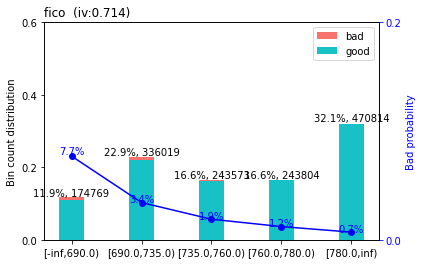

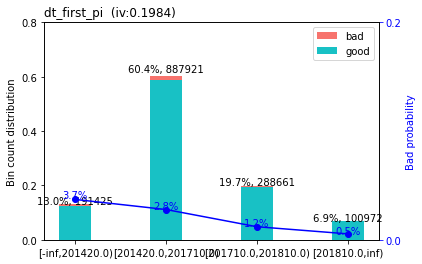

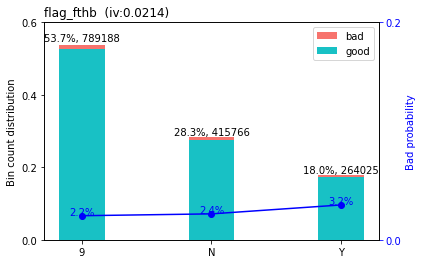

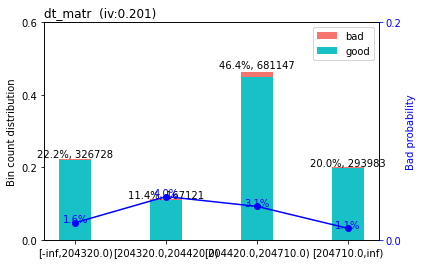

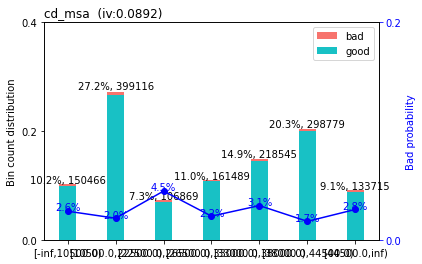

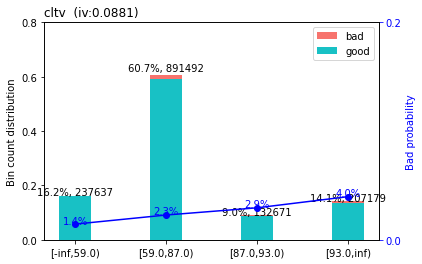

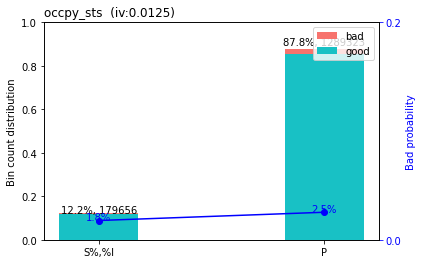

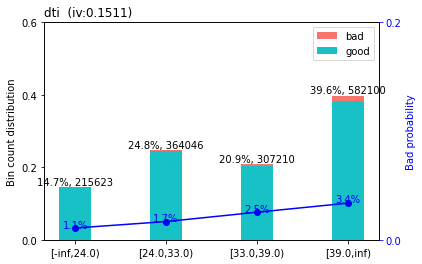

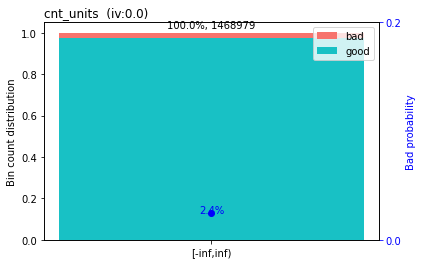

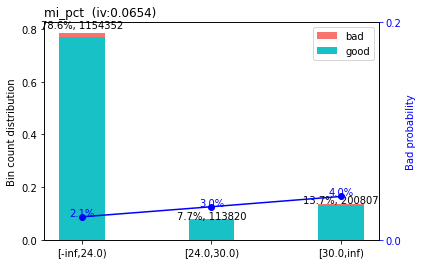

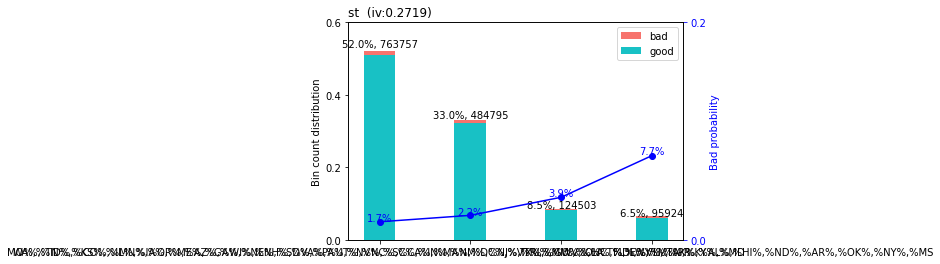

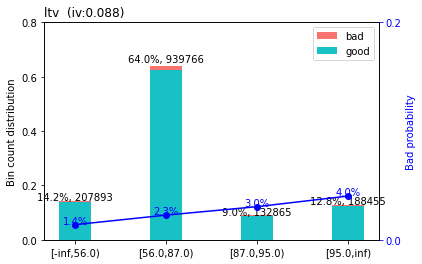

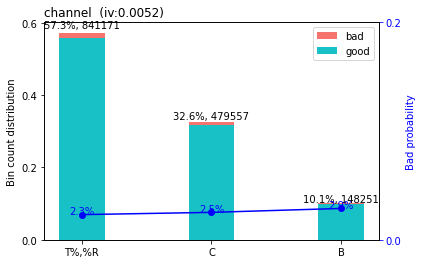

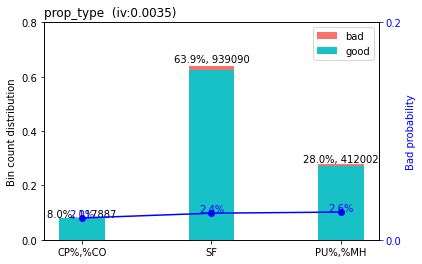

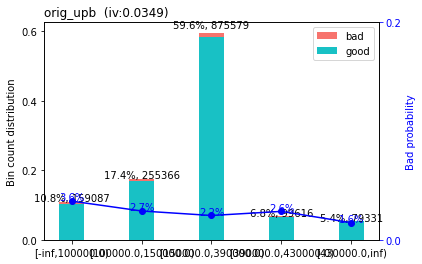

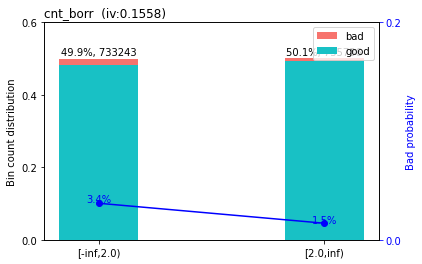

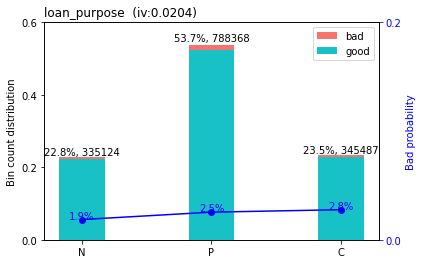

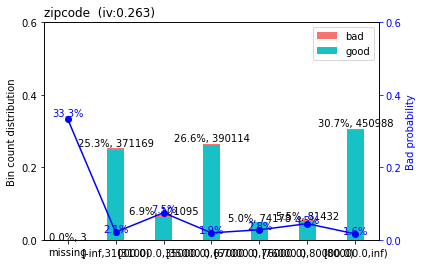

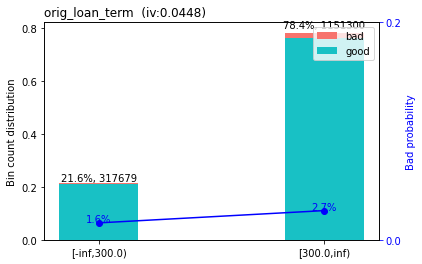

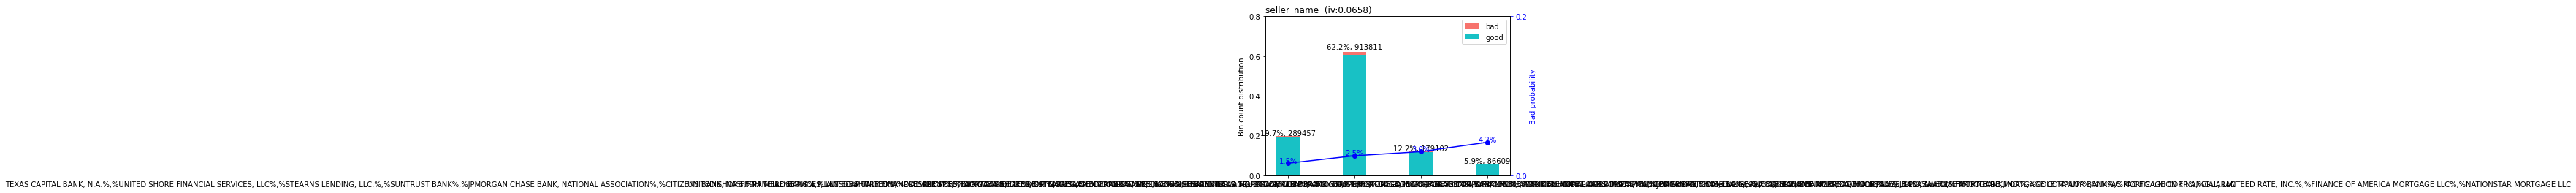

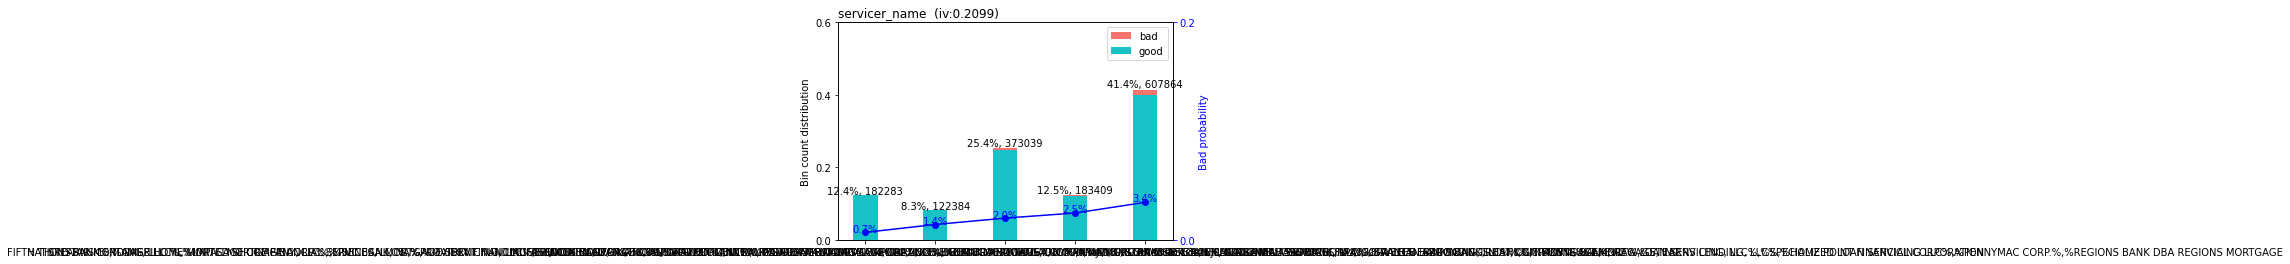

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

-------- 1/20 fico --------
>>> dt[fico].describe(): 
count    1.468979e+06
mean     7.494427e+02
std      4.523170e+01
min      5.170000e+02
25%      7.170000e+02
50%      7.580000e+02
75%      7.870000e+02
max      8.390000e+02
Name: fico, dtype: float64 



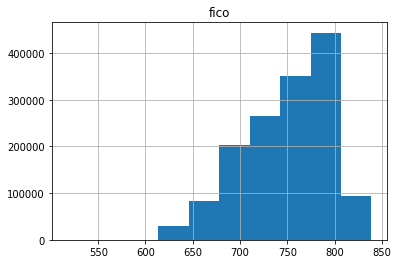

>>> Current breaks:
690.0,735.0,760.0,780.0 



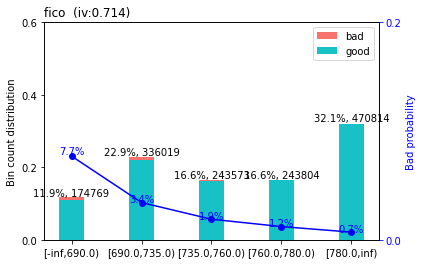

>>> Adjust breaks for (1/20) fico?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/20 dt_first_pi --------
>>> dt[dt_first_pi].describe(): 
count    1.468979e+06
mean     2.016245e+05
std      1.358651e+02
min      2.014020e+05
25%      2.015070e+05
50%      2.016090e+05
75%      2.017100e+05
max      2.019080e+05
Name: dt_first_pi, dtype: float64 



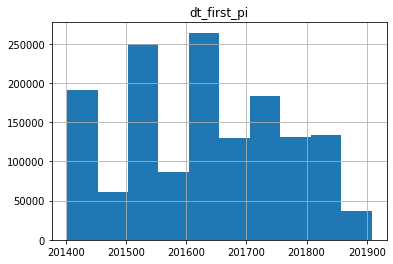

>>> Current breaks:
201420.0,201710.0,201810.0 



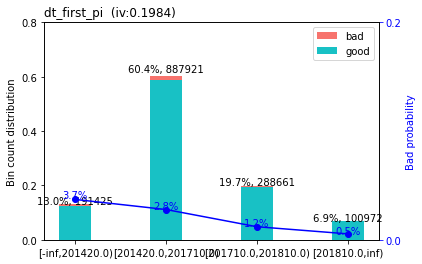

>>> Adjust breaks for (2/20) dt_first_pi?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/20 flag_fthb --------
>>> dt[flag_fthb].describe(): 
count     1468979
unique          3
top             9
freq       789188
Name: flag_fthb, dtype: object 

>>> dt[flag_fthb].value_counts(): 
9    789188
N    415766
Y    264025
Name: flag_fthb, dtype: int64 

>>> Current breaks:
'9','N','Y' 



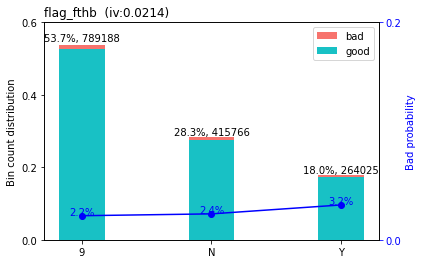

>>> Adjust breaks for (3/20) flag_fthb?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/20 dt_matr --------
>>> dt[dt_matr].describe(): 
count    1.468979e+06
mean     2.043047e+05
std      6.172860e+02
min      2.022020e+05
25%      2.044050e+05
50%      2.046010e+05
75%      2.047060e+05
max      2.060020e+05
Name: dt_matr, dtype: float64 



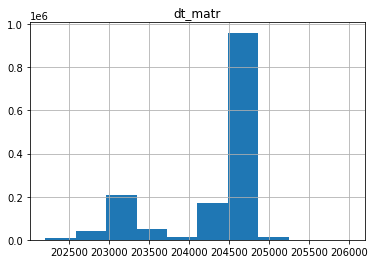

>>> Current breaks:
204320.0,204420.0,204710.0 



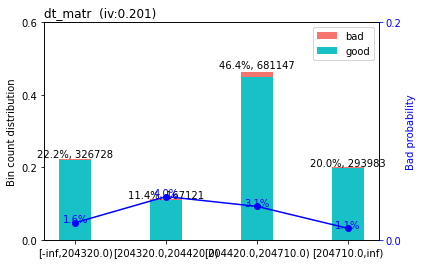

>>> Adjust breaks for (4/20) dt_matr?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 204706, 204710
[INFO] creating woe binning ...
Binning on 1468979 rows and 2 columns in 00:00:12
>>> Current breaks:
204706.0, 204710.0 



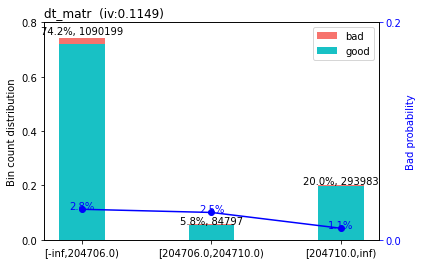

>>> Adjust breaks for (4/20) dt_matr?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/20 cd_msa --------
>>> dt[cd_msa].describe(): 
count    1.468979e+06
mean     2.728061e+04
std      1.401194e+04
min      0.000000e+00
25%      1.697400e+04
50%      2.982000e+04
75%      3.894000e+04
max      4.974000e+04
Name: cd_msa, dtype: float64 



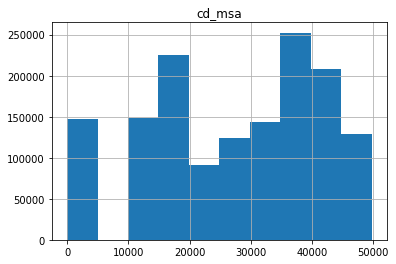

>>> Current breaks:
10500.0,22500.0,26500.0,33000.0,38000.0,44500.0 



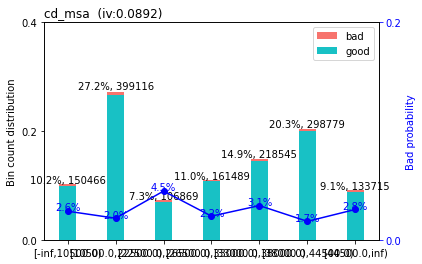

>>> Adjust breaks for (5/20) cd_msa?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/20 cltv --------
>>> dt[cltv].describe(): 
count    1.468979e+06
mean     7.434274e+01
std      1.648280e+01
min      6.000000e+00
25%      6.700000e+01
50%      8.000000e+01
75%      8.500000e+01
max      1.210000e+02
Name: cltv, dtype: float64 



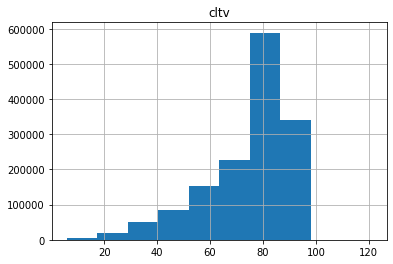

>>> Current breaks:
59.0,87.0,93.0 



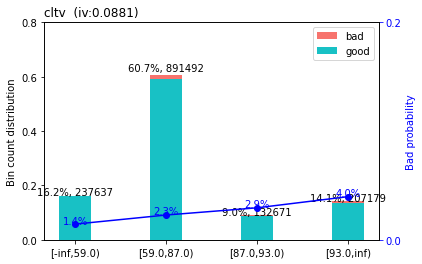

>>> Adjust breaks for (6/20) cltv?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/20 occpy_sts --------
>>> dt[occpy_sts].describe(): 
count     1468979
unique          3
top             P
freq      1289323
Name: occpy_sts, dtype: object 

>>> dt[occpy_sts].value_counts(): 
P    1289323
I     122720
S      56936
Name: occpy_sts, dtype: int64 

>>> Current breaks:
'S%,%I','P' 



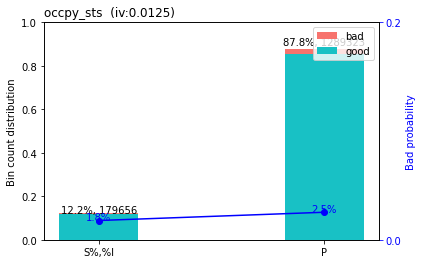

>>> Adjust breaks for (7/20) occpy_sts?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/20 dti --------
>>> dt[dti].describe(): 
count    1.468979e+06
mean     3.446108e+01
std      9.403767e+00
min      1.000000e+00
25%      2.800000e+01
50%      3.600000e+01
75%      4.200000e+01
max      5.100000e+01
Name: dti, dtype: float64 



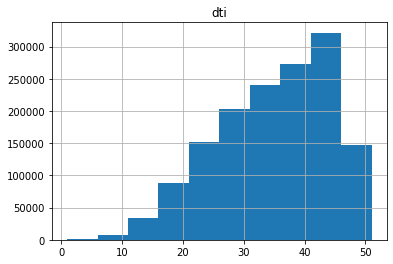

>>> Current breaks:
24.0,33.0,39.0 



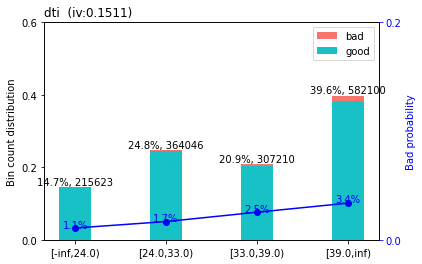

>>> Adjust breaks for (8/20) dti?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/20 mi_pct --------
>>> dt[mi_pct].describe(): 
count    1.468979e+06
mean     6.506126e+00
std      1.160542e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.200000e+01
max      5.000000e+01
Name: mi_pct, dtype: float64 



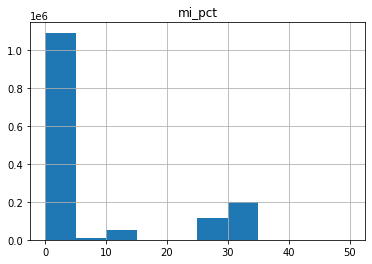

>>> Current breaks:
24.0,30.0 



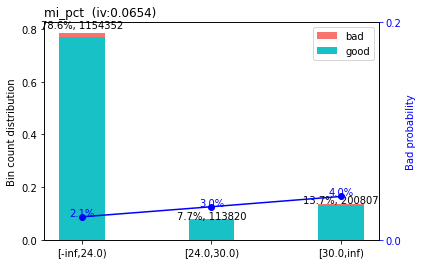

>>> Adjust breaks for (9/20) mi_pct?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/20 st --------
>>> dt[st].describe(): 
count     1468979
unique         54
top            CA
freq       214063
Name: st, dtype: object 

>>> dt[st].value_counts(): 
CA    214063
TX    110845
FL     95658
IL     66004
MI     51493
CO     50152
OH     47915
NY     47101
WA     46139
NC     44936
GA     43641
AZ     43356
PA     41701
VA     36969
NJ     35189
MN     33964
MA     33722
IN     33428
OR     29391
MO     29267
WI     28671
TN     28617
MD     25691
UT     24232
SC     20612
KY     17696
NV     17127
AL     13926
LA     13411
CT     13091
IA     12903
KS     12887
OK     10615
ID      9813
AR      9449
NH      7651
NE      7029
MT      5908
NM      5901
ME      5594
HI      5061
MS      4779
DE      4700
RI      4640
ND      4023
WV      3941
VT      3838
DC      3457
AK      2965
SD      2762
WY      2542
GU       247
PR       151
VI       115
Name: st, dtype: int64 

>>> Current breaks:
'

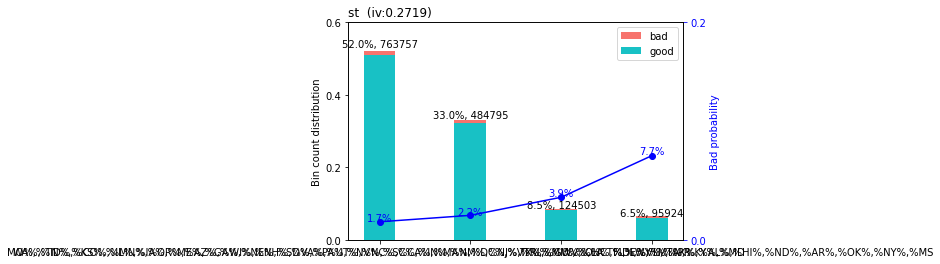

>>> Adjust breaks for (10/20) st?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/20 ltv --------
>>> dt[ltv].describe(): 
count    1.468979e+06
mean     7.391858e+01
std      1.654859e+01
min      6.000000e+00
25%      6.600000e+01
50%      7.900000e+01
75%      8.300000e+01
max      1.030000e+02
Name: ltv, dtype: float64 



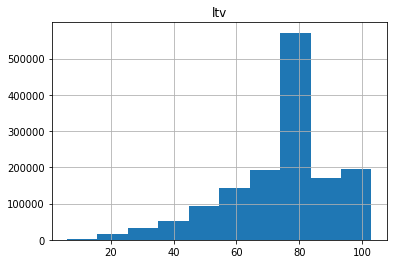

>>> Current breaks:
56.0,87.0,95.0 



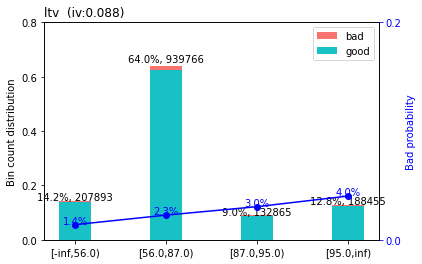

>>> Adjust breaks for (11/20) ltv?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/20 channel --------
>>> dt[channel].describe(): 
count     1468979
unique          4
top             R
freq       841170
Name: channel, dtype: object 

>>> dt[channel].value_counts(): 
R    841170
C    479557
B    148251
T         1
Name: channel, dtype: int64 

>>> Current breaks:
'T%,%R','C','B' 



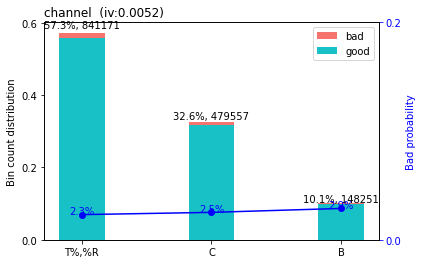

>>> Adjust breaks for (12/20) channel?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/20 prop_type --------
>>> dt[prop_type].describe(): 
count     1468979
unique          5
top            SF
freq       939090
Name: prop_type, dtype: object 

>>> dt[prop_type].value_counts(): 
SF    939090
PU    407057
CO    115304
MH      4945
CP      2583
Name: prop_type, dtype: int64 

>>> Current breaks:
'CP%,%CO','SF','PU%,%MH' 



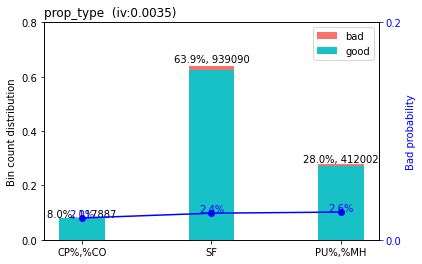

>>> Adjust breaks for (13/20) prop_type?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/20 orig_upb --------
>>> dt[orig_upb].describe(): 
count    1.468979e+06
mean     2.331022e+05
std      1.208059e+05
min      6.000000e+03
25%      1.400000e+05
50%      2.100000e+05
75%      3.090000e+05
max      9.950000e+05
Name: orig_upb, dtype: float64 



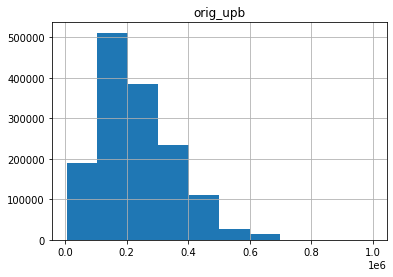

>>> Current breaks:
100000.0,150000.0,390000.0,430000.0 



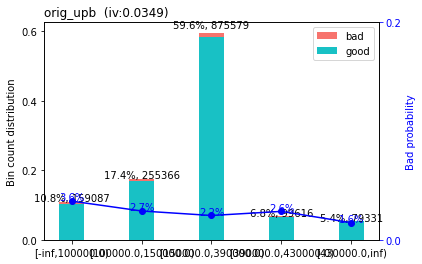

>>> Adjust breaks for (14/20) orig_upb?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/20 cnt_borr --------
>>> dt[cnt_borr].describe(): 
count    1.468979e+06
mean     1.500849e+00
std      4.999995e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: cnt_borr, dtype: float64 

>>> dt[cnt_borr].value_counts(): 
2    735736
1    733243
Name: cnt_borr, dtype: int64 

>>> Current breaks:
2.0 



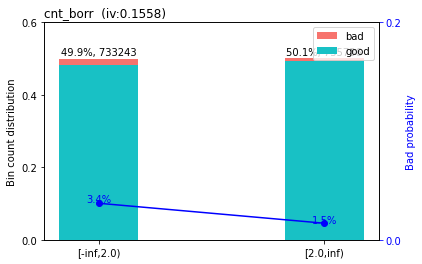

>>> Adjust breaks for (15/20) cnt_borr?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/20 loan_purpose --------
>>> dt[loan_purpose].describe(): 
count     1468979
unique          3
top             P
freq       788368
Name: loan_purpose, dtype: object 

>>> dt[loan_purpose].value_counts(): 
P    788368
C    345487
N    335124
Name: loan_purpose, dtype: int64 

>>> Current breaks:
'N','P','C' 



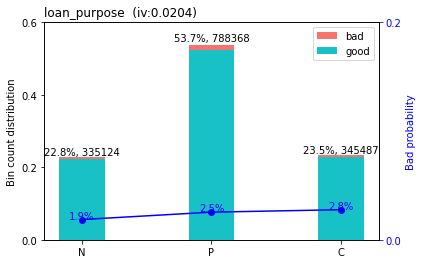

>>> Adjust breaks for (16/20) loan_purpose?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/20 zipcode --------
>>> dt[zipcode].describe(): 
count    1.468976e+06
mean     5.613958e+04
std      2.974524e+04
min      6.000000e+02
25%      3.050000e+04
50%      5.540000e+04
75%      8.460000e+04
max      9.990000e+04
Name: zipcode, dtype: float64 



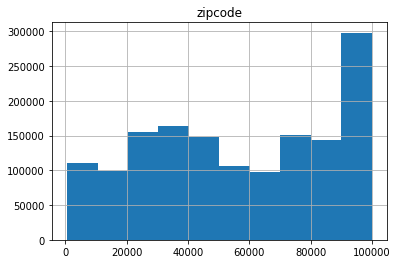

>>> Current breaks:
31000.0,35000.0,67000.0,76000.0,80000.0 



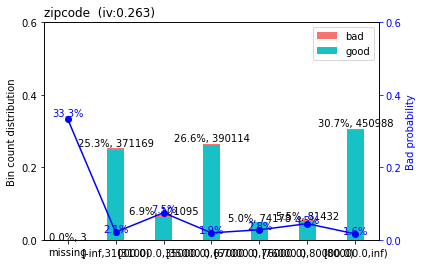

>>> Adjust breaks for (17/20) zipcode?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/20 orig_loan_term --------
>>> dt[orig_loan_term].describe(): 
count    1.468979e+06
mean     3.226127e+02
std      7.161636e+01
min      6.000000e+01
25%      3.600000e+02
50%      3.600000e+02
75%      3.600000e+02
max      5.490000e+02
Name: orig_loan_term, dtype: float64 



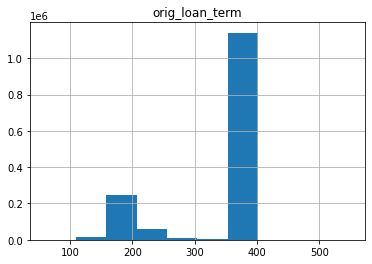

>>> Current breaks:
300.0 



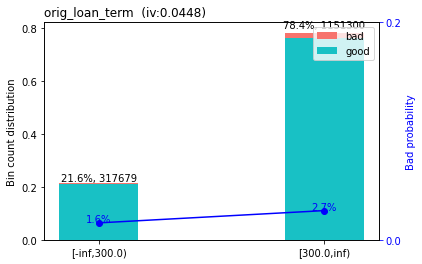

>>> Adjust breaks for (18/20) orig_loan_term?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/20 seller_name --------
>>> dt[seller_name].describe(): 
count           1468979
unique               48
top       Other sellers
freq             545397
Name: seller_name, dtype: object 

>>> dt[seller_name].value_counts(): 
Other sellers                                                   545397
WELLS FARGO BANK, N.A.                                          189746
JPMORGAN CHASE BANK, N.A.                                        91818
QUICKEN LOANS INC.                                               74951
U.S. BANK N.A.                                                   71340
CALIBER HOME LOANS, INC.                                         53989
BANK OF AMERICA, N.A.                                            53815
BRANCH BANKING & TRUST COMPANY                                   47184
AMERIHOME MORTGAGE COMPANY, LLC                                  39753
LOANDEPOT.COM, LLC                      

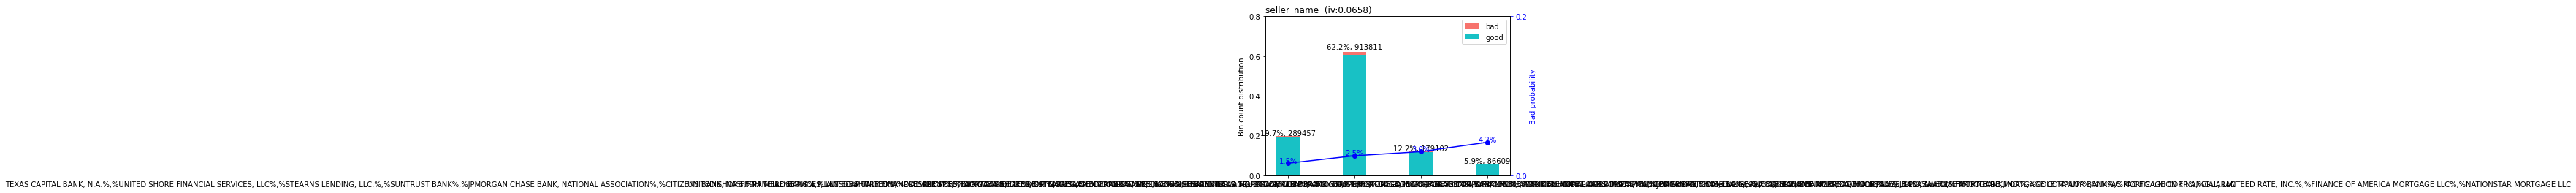

>>> Adjust breaks for (19/20) seller_name?
1: next 
2: yes 
3: back
Selection: 1
-------- 20/20 servicer_name --------
>>> dt[servicer_name].describe(): 
count             1468979
unique                 45
top       Other servicers
freq               424432
Name: servicer_name, dtype: object 

>>> dt[servicer_name].value_counts(): 
Other servicers                              424432
WELLS FARGO BANK, N.A.                       198071
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     97252
U.S. BANK N.A.                                79126
QUICKEN LOANS INC.                            75223
NEW RESIDENTIAL MORTGAGE LLC                  54814
BANK OF AMERICA, N.A.                         53291
CALIBER HOME LOANS, INC.                      53173
MATRIX FINANCIAL SERVICES CORPORATION         50580
BRANCH BANKING AND TRUST COMPANY              37747
PNC BANK, NA                                  35961
PINGORA LOAN SERVICING, LLC                   34776
SUNTRUST BANK                             

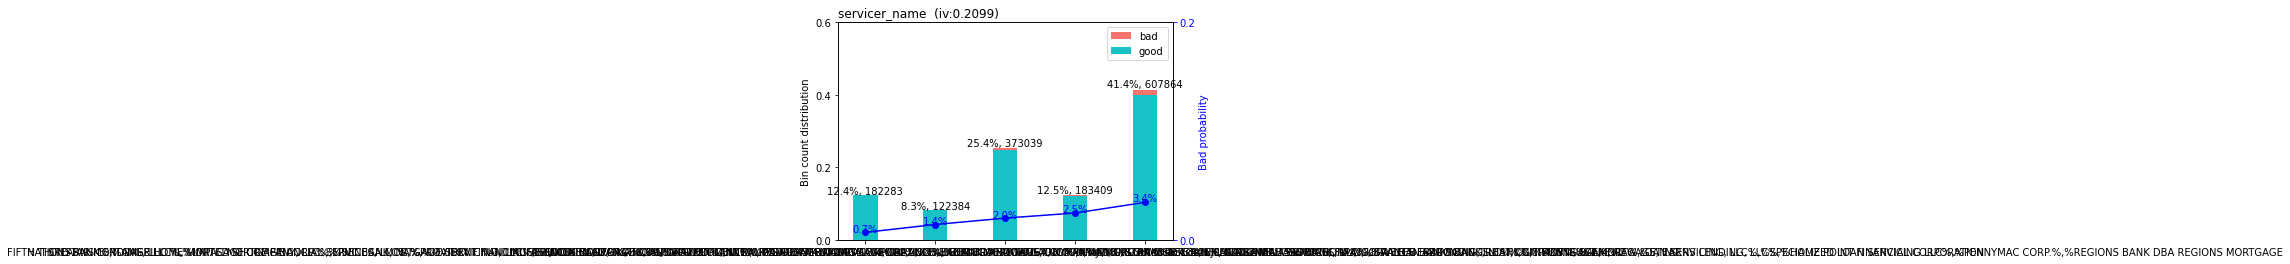

>>> Adjust breaks for (20/20) servicer_name?
1: next 
2: yes 
3: back
Selection: 3
-------- 19/20 seller_name --------
>>> dt[seller_name].describe(): 
count           1468979
unique               48
top       Other sellers
freq             545397
Name: seller_name, dtype: object 

>>> dt[seller_name].value_counts(): 
Other sellers                                                   545397
WELLS FARGO BANK, N.A.                                          189746
JPMORGAN CHASE BANK, N.A.                                        91818
QUICKEN LOANS INC.                                               74951
U.S. BANK N.A.                                                   71340
CALIBER HOME LOANS, INC.                                         53989
BANK OF AMERICA, N.A.                                            53815
BRANCH BANKING & TRUST COMPANY                                   47184
AMERIHOME MORTGAGE COMPANY, LLC                                  39753
LOANDEPOT.COM, LLC                       

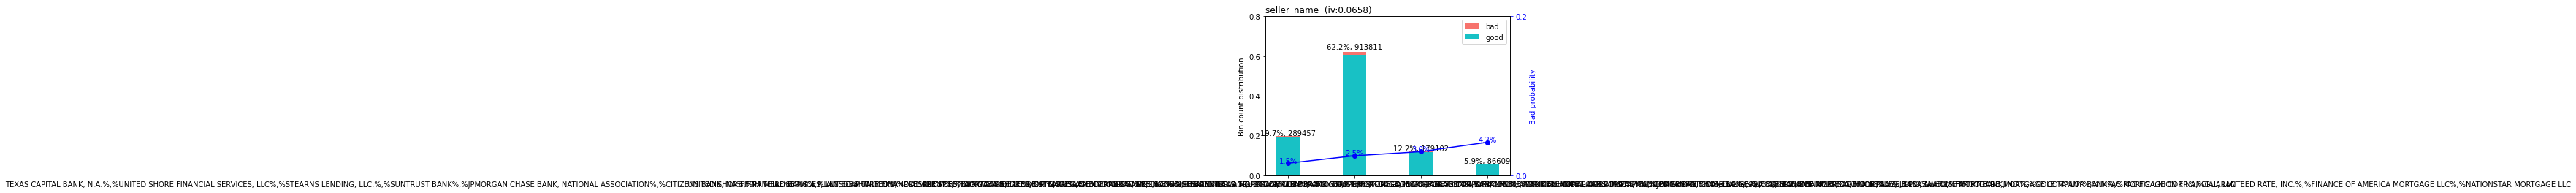

>>> Adjust breaks for (19/20) seller_name?
1: next 
2: yes 
3: back
Selection: 1
-------- 20/20 servicer_name --------
>>> dt[servicer_name].describe(): 
count             1468979
unique                 45
top       Other servicers
freq               424432
Name: servicer_name, dtype: object 

>>> dt[servicer_name].value_counts(): 
Other servicers                              424432
WELLS FARGO BANK, N.A.                       198071
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     97252
U.S. BANK N.A.                                79126
QUICKEN LOANS INC.                            75223
NEW RESIDENTIAL MORTGAGE LLC                  54814
BANK OF AMERICA, N.A.                         53291
CALIBER HOME LOANS, INC.                      53173
MATRIX FINANCIAL SERVICES CORPORATION         50580
BRANCH BANKING AND TRUST COMPANY              37747
PNC BANK, NA                                  35961
PINGORA LOAN SERVICING, LLC                   34776
SUNTRUST BANK                             

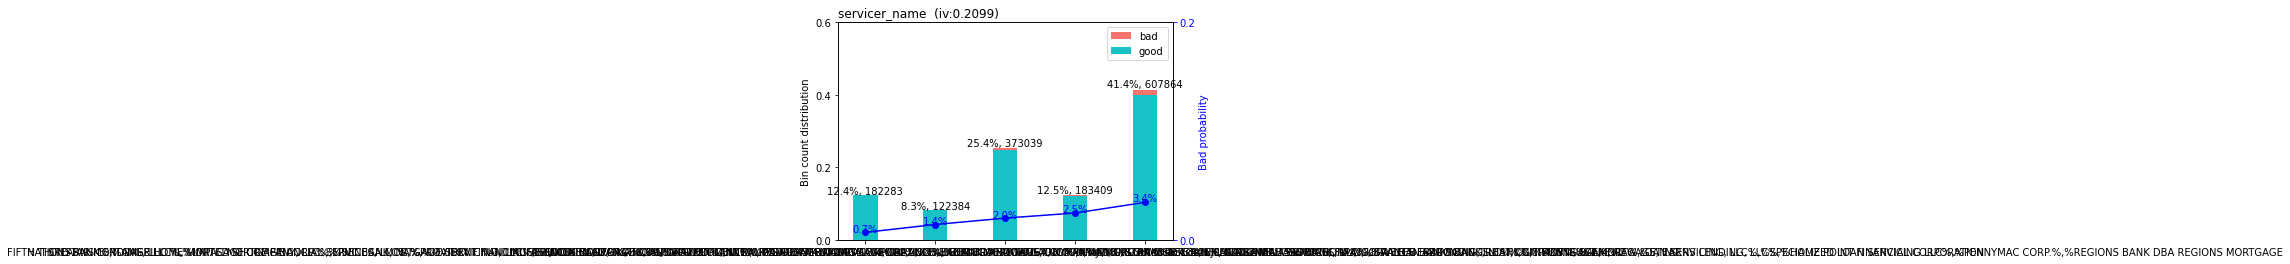

>>> Adjust breaks for (20/20) servicer_name?
1: next 
2: yes 
3: back
Selection: 1


In [259]:
breaks_adj = sc.woebin_adj(train, "Default", bins, adj_all_var = True)

In [ ]:
#dt_matr 204706, 204710

In [ ]:
breaks_adj

In [32]:
breaks_adj = {'cd_msa': [10500.0,22500.0,26500.0,33000.0,38000.0,44500.0], 'channel': ['T%,%R','C','B'], 'cltv': [59.0,87.0,93.0], 'cnt_borr': [2.0], 'dt_first_pi': [201420.0,201710.0,201810.0], 'dt_matr': [204706, 204710], 'dti': [24.0,33.0,39.0], 'fico': [690.0,735.0,760.0,780.0], 'flag_fthb': ['9','N','Y'], 'loan_purpose': ['N','P','C'], 'ltv': [56.0,87.0,95.0], 'mi_pct': [24.0,30.0], 'occpy_sts': ['S%,%I','P'], 'orig_loan_term': [300.0], 'orig_upb': [100000.0,150000.0,390000.0,430000.0], 'prop_type': ['CP%,%CO','SF','PU%,%MH'], 'seller_name': ['TEXAS CAPITAL BANK, N.A.%,%UNITED SHORE FINANCIAL SERVICES, LLC%,%STEARNS LENDING, LLC.%,%SUNTRUST BANK%,%JPMORGAN CHASE BANK, NATIONAL ASSOCIATION%,%CITIZENS BANK, NA%,%PRIMELENDING A PLAINS CAPITAL CO%,%PROVIDENT FUNDING ASSOCIATES, L.P.%,%USAA FEDERAL SAVINGS BANK%,%NATIONSTAR MORTGAGE LLC DBA MR. COOPER%,%GUILD MORTGAGE COMPANY%,%HOME POINT FINANCIAL CORPORATION%,%JPMORGAN CHASE BANK, N.A.%,%BANK OF AMERICA, N.A.%,%U.S. BANK N.A.%,%FIFTH THIRD MORTGAGE COMPANY%,%IMPAC MORTGAGE CORP.%,%GUARANTEED RATE, INC.%,%FINANCE OF AMERICA MORTGAGE LLC%,%NATIONSTAR MORTGAGE LLC','UNITED SHORE FINANCIAL SERVICES, LLC, DBA UNITED WHOLESALE M%,%FAIRWAY INDEPENDENT MORTGAGE CORPORATION%,%BRANCH BANKING & TRUST COMPANY%,%SUNTRUST MORTGAGE, INC.%,%FLAGSTAR BANK, FSB%,%PRIMELENDING, A PLAINSCAPITAL COMPANY%,%Other sellers%,%AMERIHOME MORTGAGE COMPANY, LLC%,%WELLS FARGO BANK, N.A.','PROSPECT MORTGAGE, LLC%,%STEARNS LENDING, LLC%,%REDWOOD RESIDENTIAL ACQUISITION CORPORATION%,%PHH MORTGAGE CORPORATION%,%FRANKLIN AMERICAN MORTGAGE COMPANY%,%LOANDEPOT.COM, LLC%,%QUICKEN LOANS INC.%,%CITIMORTGAGE, INC.','FIFTH THIRD BANK%,%UNITED SHORE FINANCIAL SERVICES, LLC., DBA SHORE MORTGAGE%,%CMG MORTGAGE, INC.%,%STEARNS LENDING, INC.%,%PENNYMAC CORP.%,%STONEGATE MORTGAGE CORPORATION%,%CALIBER HOME LOANS, INC.%,%UNITED SHORE FINANCIAL SERVICES, LLC., DBA UNITED WHOLESALE%,%PLAZA HOME MORTGAGE, INC.%,%COLE TAYLOR BANK%,%PACIFIC UNION FINANCIAL, LLC'], 'servicer_name': ['STEARNS LENDING, LLC.%,%UNITED SHORE FINANCIAL SERVICES, LLC%,%PROVIDENT FUNDING ASSOCIATES, L.P.%,%LOANDEPOT.COM, LLC%,%AURORA FINANCIAL GROUP, INC.%,%BANK OF AMERICA, N.A.%,%JPMORGAN CHASE BANK, NATIONAL ASSOCIATION%,%USAA FEDERAL SAVINGS BANK%,%SUNTRUST MORTGAGE, INC.','MUFG UNION BANK, N.A.%,%SUNTRUST BANK%,%PODIUM MORTGAGE CAPITAL LLC%,%GUILD MORTGAGE COMPANY%,%U.S. BANK N.A.%,%JPMORGAN CHASE BANK, N.A.','NATIONSTAR MORTGAGE LLC%,%IMPAC MORTGAGE CORP.%,%PNC BANK, NA%,%MATRIX FINANCIAL SERVICES CORPORATION%,%ARVEST CENTRAL MORTGAGE COMPANY%,%BRANCH BANKING AND TRUST COMPANY%,%RUSHMORE LOAN MANAGEMENT SERVICES, LLC%,%WELLS FARGO BANK, N.A.%,%CITIZENS BANK, NA%,%STEARNS LENDING, LLC%,%HOME POINT FINANCIAL CORPORATION','FREEDOM MORTGAGE CORPORATION%,%NEW RESIDENTIAL MORTGAGE LLC%,%CALIBER HOME LOANS, INC.%,%NATIONSTAR MORTGAGE LLC DBA MR. COOPER%,%PINGORA LOAN SERVICING, LLC%,%CITIMORTGAGE, INC.','FIFTH THIRD BANK%,%AMERIHOME MORTGAGE COMPANY, LLC%,%SENECA MORTGAGE SERVICING, LLC%,%QUICKEN LOANS INC.%,%ROUNDPOINT MORTGAGE SERVICING CORPORATION%,%CENTRAL MORTGAGE COMPANY%,%Other servicers%,%COLONIAL SAVINGS, F.A.%,%BRANCH BANKING & TRUST COMPANY%,%LAKEVIEW LOAN SERVICING, LLC%,%SPECIALIZED LOAN SERVICING LLC%,%PENNYMAC CORP.%,%REGIONS BANK DBA REGIONS MORTGAGE'], 'st': ['WA%,%ID%,%CO%,%MN%,%OR%,%AZ%,%WI%,%NH%,%VA%,%UT%,%NC%,%CA%,%MA%,%DC%,%VT%,%MI%,%OH%,%DE%,%MT%,%KY%,%MD','MO%,%TN%,%KS%,%IL%,%IA%,%ME%,%GA%,%NE%,%SD%,%PA%,%NV%,%SC%,%IN%,%NM%,%NJ%,%RI%,%WV%,%CT%,%WY%,%AK%,%AL%,%HI%,%ND%,%AR%,%OK%,%NY%,%MS','TX%,%GU%,%LA','FL%,%VI%,%PR'], 'zipcode': [31000.0,35000.0,67000.0,76000.0,80000.0]}

In [34]:
bankloan_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BankloanCleanB1123.pkl')

In [35]:
bankloan_train_noWoE = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/train1123.pkl')

In [37]:
train.drop(columns='cnt_units', inplace=True)

In [38]:
train.drop(columns='flag_sc', inplace=True)

In [39]:
train

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,Default
0,717,201404,9,204403,39300.0,0,I,77,41,107000,77,R,N,RI,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",0
1,813,201405,Y,204404,19780.0,30,P,95,32,165000,95,R,N,IA,SF,50300.0,P,360,1,Other sellers,Other servicers,1
2,742,201403,9,204402,0.0,0,P,78,45,139000,78,R,N,KY,SF,42100.0,C,360,1,Other sellers,Other servicers,0
3,735,201405,9,204404,33460.0,0,P,86,45,417000,67,R,N,MN,SF,55000.0,N,360,2,Other sellers,Other servicers,0
4,667,201403,N,204402,0.0,25,P,90,30,99000,90,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098584,779,201908,9,204907,29460.0,0,P,80,41,282000,80,R,N,FL,PU,33800.0,N,360,2,Other sellers,Other servicers,0
2098586,721,201906,9,204905,24340.0,0,P,54,42,200000,54,R,N,MI,SF,49400.0,N,360,2,Other sellers,Other servicers,0
2098587,747,201901,9,204812,38060.0,0,I,82,36,264000,47,C,N,AZ,PU,85200.0,N,360,1,"FLAGSTAR BANK, FSB",Other servicers,0
2098589,666,201907,N,204906,0.0,12,P,85,37,136000,85,R,N,AZ,MH,85900.0,P,360,2,Other sellers,Other servicers,0


In [40]:
test

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Default
11,780,201403,9,204402,30700.0,0,1,P,80,44,412000,80,B,N,NE,PU,68500.0,N,360,2,Other sellers,Other servicers,0,0
12,738,201403,N,204402,14540.0,0,1,P,50,23,200000,50,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0,0
40,681,201403,9,204402,43300.0,0,1,P,80,43,292000,80,R,N,TX,SF,76200.0,C,360,2,Other sellers,Other servicers,0,0
41,757,201403,9,204402,43300.0,0,1,P,77,28,261000,77,R,N,TX,SF,76200.0,N,360,2,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0,0
42,780,201403,9,204402,0.0,0,1,P,65,17,80000,65,R,N,MO,SF,65400.0,C,360,1,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098583,792,201902,N,203401,26420.0,0,1,P,80,42,184000,80,C,N,TX,SF,77500.0,P,180,1,"TEXAS CAPITAL BANK, N.A.",Other servicers,0,0
2098585,755,201908,N,204907,29620.0,30,1,P,95,34,267000,95,R,N,MI,SF,48800.0,P,360,2,Other sellers,Other servicers,0,0
2098588,777,201812,9,203811,47894.0,0,1,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0,0
2098591,772,201908,9,203407,42700.0,0,1,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0,0


In [41]:
test.drop(columns='cnt_units', inplace=True)
test.drop(columns='flag_sc', inplace=True)
test

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,occpy_sts,cltv,dti,orig_upb,ltv,channel,ppmt_pnlty,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,Default
11,780,201403,9,204402,30700.0,0,P,80,44,412000,80,B,N,NE,PU,68500.0,N,360,2,Other sellers,Other servicers,0
12,738,201403,N,204402,14540.0,0,P,50,23,200000,50,R,N,KY,SF,42100.0,P,360,2,Other sellers,Other servicers,0
40,681,201403,9,204402,43300.0,0,P,80,43,292000,80,R,N,TX,SF,76200.0,C,360,2,Other sellers,Other servicers,0
41,757,201403,9,204402,43300.0,0,P,77,28,261000,77,R,N,TX,SF,76200.0,N,360,2,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0
42,780,201403,9,204402,0.0,0,P,65,17,80000,65,R,N,MO,SF,65400.0,C,360,1,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098583,792,201902,N,203401,26420.0,0,P,80,42,184000,80,C,N,TX,SF,77500.0,P,180,1,"TEXAS CAPITAL BANK, N.A.",Other servicers,0
2098585,755,201908,N,204907,29620.0,30,P,95,34,267000,95,R,N,MI,SF,48800.0,P,360,2,Other sellers,Other servicers,0
2098588,777,201812,9,203811,47894.0,0,P,75,21,482000,75,C,N,VA,SF,22000.0,C,240,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",0
2098591,772,201908,9,203407,42700.0,0,P,79,37,188000,79,R,N,FL,SF,33800.0,N,180,1,Other sellers,Other servicers,0


In [47]:
bins_adj = sc.woebin(train, y="Default", breaks_list=breaks_adj)

[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: ppmt_pnlty)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
st
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 1468979 rows and 21 columns in 00:01:47


In [48]:
train_woe = sc.woebin_ply(train, bins_adj)

[INFO] converting into woe values ...


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Woe transformating on 1468979 rows and 20 columns in 00:01:11


In [49]:
train_woe

,ppmt_pnlty,Default,cnt_borr_woe,flag_fthb_woe,ltv_woe,prop_type_woe,servicer_name_woe,dt_matr_woe,st_woe,seller_name_woe,orig_loan_term_woe,dt_first_pi_woe,channel_woe,zipcode_woe,occpy_sts_woe,cltv_woe,dti_woe,fico_woe,cd_msa_woe,loan_purpose_woe,orig_upb_woe,mi_pct_woe
0,N,0,-0.479791,-0.099417,-0.074159,0.002681,0.354236,0.143671,-0.083833,0.009747,0.097862,0.432286,-0.053804,-0.155378,-0.325731,-0.070572,0.332367,0.349637,-0.371234,0.041938,0.084535,-0.147710
1,N,1,0.329048,0.280009,0.515309,0.002681,0.354236,0.143671,-0.083833,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,0.500852,-0.383079,-1.259711,-0.211803,0.041938,-0.089903,0.506677
2,N,0,0.329048,-0.099417,-0.074159,0.002681,0.354236,0.143671,-0.395957,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,-0.070572,0.332367,-0.261172,0.076154,0.129139,0.084535,-0.147710
3,N,0,-0.479791,-0.099417,-0.074159,0.002681,0.354236,0.143671,-0.395957,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,-0.070572,0.332367,-0.261172,0.261178,-0.275568,0.070229,-0.147710
4,N,0,-0.479791,-0.023819,0.227335,0.002681,0.354236,0.143671,-0.395957,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,0.191220,-0.383079,1.203690,0.076154,0.041938,0.388763,0.225833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098584,N,0,-0.479791,-0.099417,-0.074159,0.044861,0.354236,-0.847977,1.211043,0.009747,0.097862,-1.515554,-0.053804,1.171406,0.038296,-0.070572,0.332367,-0.708896,-0.117376,-0.275568,-0.089903,-0.147710
2098586,N,0,-0.479791,-0.099417,-0.570950,0.002681,0.354236,-0.847977,-0.395957,0.009747,0.097862,-1.515554,-0.053804,-0.245878,0.038296,-0.535630,0.332367,0.349637,0.628798,-0.275568,-0.089903,-0.147710
2098587,N,0,0.329048,-0.099417,-0.570950,0.044861,0.354236,-0.847977,-0.395957,0.009747,0.097862,-1.515554,0.033997,-0.410360,-0.325731,-0.070572,0.039008,-0.261172,-0.371234,-0.275568,-0.089903,-0.147710
2098589,N,0,-0.479791,-0.023819,-0.074159,0.044861,0.354236,-0.847977,-0.395957,0.009747,0.097862,-1.515554,-0.053804,-0.410360,0.038296,-0.070572,0.039008,1.203690,0.076154,0.041938,0.084535,-0.147710


In [50]:
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
Woe transformating on 629562 rows and 20 columns in 00:00:32


In [51]:
test_woe

,ppmt_pnlty,Default,cnt_borr_woe,flag_fthb_woe,ltv_woe,prop_type_woe,servicer_name_woe,dt_matr_woe,st_woe,seller_name_woe,orig_loan_term_woe,dt_first_pi_woe,channel_woe,zipcode_woe,occpy_sts_woe,cltv_woe,dti_woe,fico_woe,cd_msa_woe,loan_purpose_woe,orig_upb_woe,mi_pct_woe
11,N,0,-0.479791,-0.099417,-0.074159,0.044861,0.354236,0.143671,-0.083833,0.009747,0.097862,0.432286,0.171152,0.125403,0.038296,-0.070572,0.332367,-1.259711,-0.117376,-0.275568,0.070229,-0.147710
12,N,0,-0.479791,-0.023819,-0.570950,0.002681,0.354236,0.143671,-0.395957,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,-0.535630,-0.824454,-0.261172,-0.211803,0.041938,-0.089903,-0.147710
40,N,0,-0.479791,-0.099417,-0.074159,0.002681,0.354236,0.143671,0.487321,0.009747,0.097862,0.432286,-0.053804,0.621637,0.038296,-0.070572,0.332367,1.203690,-0.371234,0.129139,-0.089903,-0.147710
41,N,0,-0.479791,-0.099417,-0.074159,0.002681,0.009534,0.143671,0.487321,0.009747,0.097862,0.432286,-0.053804,0.621637,0.038296,-0.070572,-0.383079,-0.261172,-0.371234,-0.275568,-0.089903,-0.147710
42,N,0,0.329048,-0.099417,-0.074159,0.002681,0.009534,0.143671,-0.083833,0.009747,0.097862,0.432286,-0.053804,-0.245878,0.038296,-0.070572,-0.824454,-1.259711,0.076154,0.129139,0.388763,-0.147710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098583,N,0,0.329048,-0.023819,-0.074159,0.002681,0.354236,0.143671,0.487321,-0.482839,-0.459372,-1.515554,0.033997,0.621637,0.038296,-0.070572,0.332367,-1.259711,0.628798,0.041938,-0.089903,-0.147710
2098585,N,0,-0.479791,-0.023819,0.515309,0.002681,0.354236,-0.847977,-0.395957,0.009747,0.097862,-1.515554,-0.053804,-0.245878,0.038296,0.500852,0.039008,-0.261172,-0.117376,0.041938,-0.089903,0.506677
2098588,N,0,-0.479791,-0.099417,-0.074159,0.002681,-1.289941,0.143671,-0.395957,-0.482839,-0.459372,-1.515554,0.033997,-0.155378,0.038296,-0.070572,-0.824454,-0.708896,0.137280,0.129139,-0.449845,-0.147710
2098591,N,0,0.329048,-0.099417,-0.074159,0.002681,0.354236,0.143671,1.211043,0.009747,-0.459372,-1.515554,-0.053804,1.171406,0.038296,-0.070572,0.039008,-0.708896,-0.371234,-0.275568,-0.089903,-0.147710


In [273]:
sc.iv(train_woe, 'Default')

,variable,info_value
15,fico_woe,0.713996
5,st_woe,0.271878
1,zipcode_woe,0.262990
8,servicer_name_woe,0.209903
9,dt_first_pi_woe,0.198357
20,cnt_borr_woe,0.155831
13,dti_woe,0.151103
18,dt_matr_woe,0.114864
4,cd_msa_woe,0.089230
7,cltv_woe,0.088051


In [274]:
train_woe.columns

Index(['ppmt_pnlty', 'Default', 'st_woe', 'ltv_woe', 'loan_purpose_woe',
       'seller_name_woe', 'cltv_woe', 'fico_woe', 'occpy_sts_woe', 'dti_woe',
       'flag_fthb_woe', 'cd_msa_woe', 'channel_woe', 'orig_upb_woe',
       'prop_type_woe', 'dt_first_pi_woe', 'orig_loan_term_woe',
       'servicer_name_woe', 'dt_matr_woe', 'zipcode_woe', 'mi_pct_woe',
       'cnt_borr_woe'],
      dtype='object')

In [280]:
train_woe

,ppmt_pnlty,Default,st_woe,ltv_woe,loan_purpose_woe,seller_name_woe,cltv_woe,fico_woe,occpy_sts_woe,dti_woe,flag_fthb_woe,cd_msa_woe,channel_woe,orig_upb_woe,prop_type_woe,dt_first_pi_woe,orig_loan_term_woe,servicer_name_woe,dt_matr_woe,zipcode_woe,mi_pct_woe,cnt_borr_woe
0,N,0,-0.083833,-0.074159,0.041938,0.009747,-0.070572,0.349637,-0.325731,0.332367,-0.099417,-0.371234,-0.053804,0.084535,0.002681,0.432286,0.097862,0.354236,0.143671,-0.155378,-0.147710,-0.479791
1,N,1,-0.083833,0.515309,0.041938,0.009747,0.500852,-1.259711,0.038296,-0.383079,0.280009,-0.211803,-0.053804,-0.089903,0.002681,0.432286,0.097862,0.354236,0.143671,-0.245878,0.506677,0.329048
2,N,0,-0.395957,-0.074159,0.129139,0.009747,-0.070572,-0.261172,0.038296,0.332367,-0.099417,0.076154,-0.053804,0.084535,0.002681,0.432286,0.097862,0.354236,0.143671,-0.245878,-0.147710,0.329048
3,N,0,-0.395957,-0.074159,-0.275568,0.009747,-0.070572,-0.261172,0.038296,0.332367,-0.099417,0.261178,-0.053804,0.070229,0.002681,0.432286,0.097862,0.354236,0.143671,-0.245878,-0.147710,-0.479791
4,N,0,-0.395957,0.227335,0.041938,0.009747,0.191220,1.203690,0.038296,-0.383079,-0.023819,0.076154,-0.053804,0.388763,0.002681,0.432286,0.097862,0.354236,0.143671,-0.245878,0.225833,-0.479791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098584,N,0,1.211043,-0.074159,-0.275568,0.009747,-0.070572,-0.708896,0.038296,0.332367,-0.099417,-0.117376,-0.053804,-0.089903,0.044861,-1.515554,0.097862,0.354236,-0.847977,1.171406,-0.147710,-0.479791
2098586,N,0,-0.395957,-0.570950,-0.275568,0.009747,-0.535630,0.349637,0.038296,0.332367,-0.099417,0.628798,-0.053804,-0.089903,0.002681,-1.515554,0.097862,0.354236,-0.847977,-0.245878,-0.147710,-0.479791
2098587,N,0,-0.395957,-0.570950,-0.275568,0.009747,-0.070572,-0.261172,-0.325731,0.039008,-0.099417,-0.371234,0.033997,-0.089903,0.044861,-1.515554,0.097862,0.354236,-0.847977,-0.410360,-0.147710,0.329048
2098589,N,0,-0.395957,-0.074159,0.041938,0.009747,-0.070572,1.203690,0.038296,0.039008,-0.023819,0.076154,-0.053804,0.084535,0.044861,-1.515554,0.097862,0.354236,-0.847977,-0.410360,-0.147710,-0.479791


In [52]:
train_woe.drop(columns='loan_purpose_woe', inplace = True)
train_woe.drop(columns='seller_name_woe', inplace = True)
train_woe.drop(columns='occpy_sts_woe', inplace = True)
train_woe.drop(columns='flag_fthb_woe', inplace = True)
train_woe.drop(columns='cd_msa_woe', inplace = True)
train_woe.drop(columns='channel_woe', inplace = True)
train_woe.drop(columns='orig_upb_woe', inplace = True)
train_woe.drop(columns='prop_type_woe', inplace = True)
train_woe.drop(columns='orig_loan_term_woe', inplace = True)
train_woe.drop(columns='mi_pct_woe', inplace = True)
train_woe.drop(columns='ppmt_pnlty', inplace = True)
train_woe.drop(columns='ltv_woe', inplace = True)
train_woe.drop(columns='cltv_woe', inplace = True)

In [53]:
train_woe

,Default,cnt_borr_woe,servicer_name_woe,dt_matr_woe,st_woe,dt_first_pi_woe,zipcode_woe,dti_woe,fico_woe
0,0,-0.479791,0.354236,0.143671,-0.083833,0.432286,-0.155378,0.332367,0.349637
1,1,0.329048,0.354236,0.143671,-0.083833,0.432286,-0.245878,-0.383079,-1.259711
2,0,0.329048,0.354236,0.143671,-0.395957,0.432286,-0.245878,0.332367,-0.261172
3,0,-0.479791,0.354236,0.143671,-0.395957,0.432286,-0.245878,0.332367,-0.261172
4,0,-0.479791,0.354236,0.143671,-0.395957,0.432286,-0.245878,-0.383079,1.203690
...,...,...,...,...,...,...,...,...,...
2098584,0,-0.479791,0.354236,-0.847977,1.211043,-1.515554,1.171406,0.332367,-0.708896
2098586,0,-0.479791,0.354236,-0.847977,-0.395957,-1.515554,-0.245878,0.332367,0.349637
2098587,0,0.329048,0.354236,-0.847977,-0.395957,-1.515554,-0.410360,0.039008,-0.261172
2098589,0,-0.479791,0.354236,-0.847977,-0.395957,-1.515554,-0.410360,0.039008,1.203690


In [54]:
test_woe.drop(columns='loan_purpose_woe', inplace = True)
test_woe.drop(columns='seller_name_woe', inplace = True)
test_woe.drop(columns='occpy_sts_woe', inplace = True)
test_woe.drop(columns='flag_fthb_woe', inplace = True)
test_woe.drop(columns='cd_msa_woe', inplace = True)
test_woe.drop(columns='channel_woe', inplace = True)
test_woe.drop(columns='orig_upb_woe', inplace = True)
test_woe.drop(columns='prop_type_woe', inplace = True)
test_woe.drop(columns='orig_loan_term_woe', inplace = True)
test_woe.drop(columns='mi_pct_woe', inplace = True)
test_woe.drop(columns='ppmt_pnlty', inplace = True)
test_woe.drop(columns='ltv_woe', inplace = True)
test_woe.drop(columns='cltv_woe', inplace = True)

In [55]:
test_woe

,Default,cnt_borr_woe,servicer_name_woe,dt_matr_woe,st_woe,dt_first_pi_woe,zipcode_woe,dti_woe,fico_woe
11,0,-0.479791,0.354236,0.143671,-0.083833,0.432286,0.125403,0.332367,-1.259711
12,0,-0.479791,0.354236,0.143671,-0.395957,0.432286,-0.245878,-0.824454,-0.261172
40,0,-0.479791,0.354236,0.143671,0.487321,0.432286,0.621637,0.332367,1.203690
41,0,-0.479791,0.009534,0.143671,0.487321,0.432286,0.621637,-0.383079,-0.261172
42,0,0.329048,0.009534,0.143671,-0.083833,0.432286,-0.245878,-0.824454,-1.259711
...,...,...,...,...,...,...,...,...,...
2098583,0,0.329048,0.354236,0.143671,0.487321,-1.515554,0.621637,0.332367,-1.259711
2098585,0,-0.479791,0.354236,-0.847977,-0.395957,-1.515554,-0.245878,0.039008,-0.261172
2098588,0,-0.479791,-1.289941,0.143671,-0.395957,-1.515554,-0.155378,-0.824454,-0.708896
2098591,0,0.329048,0.354236,0.143671,1.211043,-1.515554,1.171406,0.039008,-0.708896


In [56]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)
!ls # Linux commands to check what files are in the computer.

BankloanClean1123.pkl	drive	     test1123.pkl  train1123.pkl
BankloanCleanB1123.pkl	sample_data  test_woe.csv  train_woe.csv


In [7]:
import pandas as pd
bankloan_train_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_woe.csv')
bankloan_test_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_woe.csv')

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

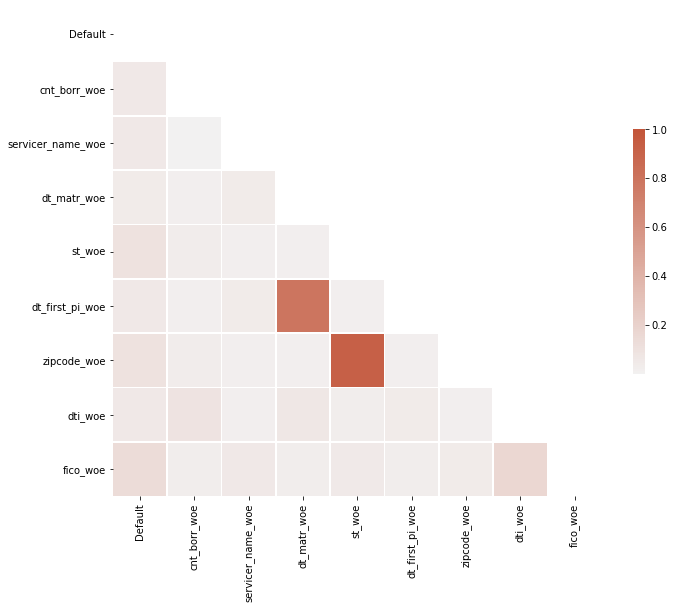

In [9]:
# Compute the correlation matrix
corr = bankloan_train_WoE.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
corr

,Default,cnt_borr_woe,servicer_name_woe,dt_matr_woe,st_woe,dt_first_pi_woe,zipcode_woe,dti_woe,fico_woe
Default,1.000000,0.059463,0.060883,0.044948,0.097042,0.057469,0.096030,0.055830,0.132934
cnt_borr_woe,0.059463,1.000000,0.000120,0.022573,0.036895,0.017531,0.034892,0.087804,0.028462
servicer_name_woe,0.060883,0.000120,1.000000,0.043799,0.016203,0.039577,0.016122,0.016231,0.055385
dt_matr_woe,0.044948,0.022573,0.043799,1.000000,0.020058,0.794960,0.016830,0.065930,0.024591
st_woe,0.097042,0.036895,0.016203,0.020058,1.000000,0.023051,0.922987,0.026632,0.048502
dt_first_pi_woe,0.057469,0.017531,0.039577,0.794960,0.023051,1.000000,0.021205,0.045628,0.025085
zipcode_woe,0.096030,0.034892,0.016122,0.016830,0.922987,0.021205,1.000000,0.016970,0.042542
dti_woe,0.055830,0.087804,0.016231,0.065930,0.026632,0.045628,0.016970,1.000000,0.164569
fico_woe,0.132934,0.028462,0.055385,0.024591,0.048502,0.025085,0.042542,0.164569,1.000000


In [11]:
bankloan_train_WoE

,Default,cnt_borr_woe,servicer_name_woe,dt_matr_woe,st_woe,dt_first_pi_woe,zipcode_woe,dti_woe,fico_woe
0,0,-0.479791,0.354236,0.143671,-0.083833,0.432286,-0.155378,0.332367,0.349637
1,1,0.329048,0.354236,0.143671,-0.083833,0.432286,-0.245878,-0.383079,-1.259711
2,0,0.329048,0.354236,0.143671,-0.395957,0.432286,-0.245878,0.332367,-0.261172
3,0,-0.479791,0.354236,0.143671,-0.395957,0.432286,-0.245878,0.332367,-0.261172
4,0,-0.479791,0.354236,0.143671,-0.395957,0.432286,-0.245878,-0.383079,1.203690
...,...,...,...,...,...,...,...,...,...
1468974,0,-0.479791,0.354236,-0.847977,1.211043,-1.515554,1.171406,0.332367,-0.708896
1468975,0,-0.479791,0.354236,-0.847977,-0.395957,-1.515554,-0.245878,0.332367,0.349637
1468976,0,0.329048,0.354236,-0.847977,-0.395957,-1.515554,-0.410360,0.039008,-0.261172
1468977,0,-0.479791,0.354236,-0.847977,-0.395957,-1.515554,-0.410360,0.039008,1.203690


In [12]:
#As we can see from the correlation heatmap, the pair of “Property State” with “Postal Code”, and “First Payment Date” with “Maturity Date” are highly correlate (for a value of 0.922987 and 0.794960 respectively). These results make sense since Postal code normally embedded the information of the state, and first payment date could imply the maturity date if the mortgage term is fixed. To avoid the correlation effects, we here remove the variable “Postal code” since this has more cases of null value and less information value comparing to “Property State”. We also remove the “Maturity Date” since its information value is less than “First Payment Date.”
bankloan_train_WoE.drop(columns='zipcode_woe', inplace = True)
bankloan_train_WoE.drop(columns='dt_matr_woe', inplace = True)
bankloan_train_WoE

,Default,cnt_borr_woe,servicer_name_woe,st_woe,dt_first_pi_woe,dti_woe,fico_woe
0,0,-0.479791,0.354236,-0.083833,0.432286,0.332367,0.349637
1,1,0.329048,0.354236,-0.083833,0.432286,-0.383079,-1.259711
2,0,0.329048,0.354236,-0.395957,0.432286,0.332367,-0.261172
3,0,-0.479791,0.354236,-0.395957,0.432286,0.332367,-0.261172
4,0,-0.479791,0.354236,-0.395957,0.432286,-0.383079,1.203690
...,...,...,...,...,...,...,...
1468974,0,-0.479791,0.354236,1.211043,-1.515554,0.332367,-0.708896
1468975,0,-0.479791,0.354236,-0.395957,-1.515554,0.332367,0.349637
1468976,0,0.329048,0.354236,-0.395957,-1.515554,0.039008,-0.261172
1468977,0,-0.479791,0.354236,-0.395957,-1.515554,0.039008,1.203690


In [25]:
bankloan_test_WoE.drop(columns='zipcode_woe', inplace = True)
bankloan_test_WoE.drop(columns='dt_matr_woe', inplace = True)
bankloan_test_WoE

,Default,cnt_borr_woe,servicer_name_woe,st_woe,dt_first_pi_woe,dti_woe,fico_woe
0,0,-0.479791,0.354236,-0.083833,0.432286,0.332367,-1.259711
1,0,-0.479791,0.354236,-0.395957,0.432286,-0.824454,-0.261172
2,0,-0.479791,0.354236,0.487321,0.432286,0.332367,1.203690
3,0,-0.479791,0.009534,0.487321,0.432286,-0.383079,-0.261172
4,0,0.329048,0.009534,-0.083833,0.432286,-0.824454,-1.259711
...,...,...,...,...,...,...,...
629557,0,0.329048,0.354236,0.487321,-1.515554,0.332367,-1.259711
629558,0,-0.479791,0.354236,-0.395957,-1.515554,0.039008,-0.261172
629559,0,-0.479791,-1.289941,-0.395957,-1.515554,-0.824454,-0.708896
629560,0,0.329048,0.354236,1.211043,-1.515554,0.039008,-0.708896


In [13]:
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.01, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251111952, # Random seed
                                     max_iter=1000000000, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'liblinear', # How to optimize.
                                     n_jobs = 4,      # Processes to use. Set to number of physical cores. 
                                     refit = True     # If to retrain with the best parameter and all data after finishing.
                                    )

In [14]:
bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['Default'] # The target
                   )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   39.0s finished


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000000000, multi_class='auto', n_jobs=4,
                     penalty='l1', random_state=251111952, refit=True,
                     scoring=None, solver='liblinear', tol=0.01, verbose=1)

In [15]:
coef_df = pd.concat([pd.DataFrame({'column': bankloan_train_WoE.columns[1:]}), 
                    pd.DataFrame(np.transpose(bankloan_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,cnt_borr_woe,1.152096
1,servicer_name_woe,0.892379
2,st_woe,0.949539
3,dt_first_pi_woe,1.040832
4,dti_woe,0.729669
5,fico_woe,0.986982


In [41]:
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251111952, # Random seed
                                     max_iter=1000000000, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'liblinear', # How to optimize.
                                     n_jobs = 4,      # Processes to use. Set to number of physical cores. 
                                     refit = True     # If to retrain with the best parameter and all data after finishing.
                                    )

In [ ]:
bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['Default'] # The target
                   )

In [23]:
coef_df = pd.concat([pd.DataFrame({'column': bankloan_train_WoE.columns[1:]}), 
                    pd.DataFrame(np.transpose(bankloan_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,cnt_borr_woe,1.153890
1,servicer_name_woe,0.892515
2,st_woe,0.949675
3,dt_first_pi_woe,1.041817
4,dti_woe,0.729655
5,fico_woe,0.987239


In [19]:
bankloan_logreg.intercept_

array([-0.01126])

In [20]:
bankloan_logreg2.intercept_

array([-0.01129034])

In [26]:
pred_class_test = bankloan_logreg.predict(bankloan_test_WoE.iloc[:, 1:])
probs_test = bankloan_logreg.predict_proba(bankloan_test_WoE.iloc[:, 1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.70664169 0.29335831]
 [0.7376577  0.2623423 ]
 [0.10955966 0.89044034]
 [0.54502856 0.45497144]
 [0.74980063 0.25019937]] [0 0 1 0 0]


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_true = bankloan_test_WoE['Default'], y_pred = pred_class_test)

array([[454341, 159853],
       [  3794,  11574]])

In [43]:
!pip install scorecardpy

In [44]:
# Package loading
import pandas as pd
import numpy as np
import scorecardpy as sc

In [45]:
# Import the files as Pandas datasets
bankloan_train_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_woe.csv')
bankloan_test_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_woe.csv')
bankloan_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BankloanCleanB1123.pkl')

In [47]:
# Eliminate unused variables
bankloan_train_WoE.drop(columns='zipcode_woe', inplace = True)
bankloan_train_WoE.drop(columns='dt_matr_woe', inplace = True)

bankloan_test_WoE.drop(columns='zipcode_woe', inplace = True)
bankloan_test_WoE.drop(columns='dt_matr_woe', inplace = True)

In [69]:
# Same train-test split as before (because of seed!)
bankloan_train_noWoE = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/train1123.pkl')
bankloan_test_noWoE = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/test1123.pkl')

In [49]:
# Give breaks for WoE
breaks_adj = {'cd_msa': [10500.0,22500.0,26500.0,33000.0,38000.0,44500.0], 'channel': ['T%,%R','C','B'], 'cltv': [59.0,87.0,93.0], 'cnt_borr': [2.0], 'dt_first_pi': [201420.0,201710.0,201810.0], 'dt_matr': [204706, 204710], 'dti': [24.0,33.0,39.0], 'fico': [690.0,735.0,760.0,780.0], 'flag_fthb': ['9','N','Y'], 'loan_purpose': ['N','P','C'], 'ltv': [56.0,87.0,95.0], 'mi_pct': [24.0,30.0], 'occpy_sts': ['S%,%I','P'], 'orig_loan_term': [300.0], 'orig_upb': [100000.0,150000.0,390000.0,430000.0], 'prop_type': ['CP%,%CO','SF','PU%,%MH'], 'seller_name': ['TEXAS CAPITAL BANK, N.A.%,%UNITED SHORE FINANCIAL SERVICES, LLC%,%STEARNS LENDING, LLC.%,%SUNTRUST BANK%,%JPMORGAN CHASE BANK, NATIONAL ASSOCIATION%,%CITIZENS BANK, NA%,%PRIMELENDING A PLAINS CAPITAL CO%,%PROVIDENT FUNDING ASSOCIATES, L.P.%,%USAA FEDERAL SAVINGS BANK%,%NATIONSTAR MORTGAGE LLC DBA MR. COOPER%,%GUILD MORTGAGE COMPANY%,%HOME POINT FINANCIAL CORPORATION%,%JPMORGAN CHASE BANK, N.A.%,%BANK OF AMERICA, N.A.%,%U.S. BANK N.A.%,%FIFTH THIRD MORTGAGE COMPANY%,%IMPAC MORTGAGE CORP.%,%GUARANTEED RATE, INC.%,%FINANCE OF AMERICA MORTGAGE LLC%,%NATIONSTAR MORTGAGE LLC','UNITED SHORE FINANCIAL SERVICES, LLC, DBA UNITED WHOLESALE M%,%FAIRWAY INDEPENDENT MORTGAGE CORPORATION%,%BRANCH BANKING & TRUST COMPANY%,%SUNTRUST MORTGAGE, INC.%,%FLAGSTAR BANK, FSB%,%PRIMELENDING, A PLAINSCAPITAL COMPANY%,%Other sellers%,%AMERIHOME MORTGAGE COMPANY, LLC%,%WELLS FARGO BANK, N.A.','PROSPECT MORTGAGE, LLC%,%STEARNS LENDING, LLC%,%REDWOOD RESIDENTIAL ACQUISITION CORPORATION%,%PHH MORTGAGE CORPORATION%,%FRANKLIN AMERICAN MORTGAGE COMPANY%,%LOANDEPOT.COM, LLC%,%QUICKEN LOANS INC.%,%CITIMORTGAGE, INC.','FIFTH THIRD BANK%,%UNITED SHORE FINANCIAL SERVICES, LLC., DBA SHORE MORTGAGE%,%CMG MORTGAGE, INC.%,%STEARNS LENDING, INC.%,%PENNYMAC CORP.%,%STONEGATE MORTGAGE CORPORATION%,%CALIBER HOME LOANS, INC.%,%UNITED SHORE FINANCIAL SERVICES, LLC., DBA UNITED WHOLESALE%,%PLAZA HOME MORTGAGE, INC.%,%COLE TAYLOR BANK%,%PACIFIC UNION FINANCIAL, LLC'], 'servicer_name': ['STEARNS LENDING, LLC.%,%UNITED SHORE FINANCIAL SERVICES, LLC%,%PROVIDENT FUNDING ASSOCIATES, L.P.%,%LOANDEPOT.COM, LLC%,%AURORA FINANCIAL GROUP, INC.%,%BANK OF AMERICA, N.A.%,%JPMORGAN CHASE BANK, NATIONAL ASSOCIATION%,%USAA FEDERAL SAVINGS BANK%,%SUNTRUST MORTGAGE, INC.','MUFG UNION BANK, N.A.%,%SUNTRUST BANK%,%PODIUM MORTGAGE CAPITAL LLC%,%GUILD MORTGAGE COMPANY%,%U.S. BANK N.A.%,%JPMORGAN CHASE BANK, N.A.','NATIONSTAR MORTGAGE LLC%,%IMPAC MORTGAGE CORP.%,%PNC BANK, NA%,%MATRIX FINANCIAL SERVICES CORPORATION%,%ARVEST CENTRAL MORTGAGE COMPANY%,%BRANCH BANKING AND TRUST COMPANY%,%RUSHMORE LOAN MANAGEMENT SERVICES, LLC%,%WELLS FARGO BANK, N.A.%,%CITIZENS BANK, NA%,%STEARNS LENDING, LLC%,%HOME POINT FINANCIAL CORPORATION','FREEDOM MORTGAGE CORPORATION%,%NEW RESIDENTIAL MORTGAGE LLC%,%CALIBER HOME LOANS, INC.%,%NATIONSTAR MORTGAGE LLC DBA MR. COOPER%,%PINGORA LOAN SERVICING, LLC%,%CITIMORTGAGE, INC.','FIFTH THIRD BANK%,%AMERIHOME MORTGAGE COMPANY, LLC%,%SENECA MORTGAGE SERVICING, LLC%,%QUICKEN LOANS INC.%,%ROUNDPOINT MORTGAGE SERVICING CORPORATION%,%CENTRAL MORTGAGE COMPANY%,%Other servicers%,%COLONIAL SAVINGS, F.A.%,%BRANCH BANKING & TRUST COMPANY%,%LAKEVIEW LOAN SERVICING, LLC%,%SPECIALIZED LOAN SERVICING LLC%,%PENNYMAC CORP.%,%REGIONS BANK DBA REGIONS MORTGAGE'], 'st': ['WA%,%ID%,%CO%,%MN%,%OR%,%AZ%,%WI%,%NH%,%VA%,%UT%,%NC%,%CA%,%MA%,%DC%,%VT%,%MI%,%OH%,%DE%,%MT%,%KY%,%MD','MO%,%TN%,%KS%,%IL%,%IA%,%ME%,%GA%,%NE%,%SD%,%PA%,%NV%,%SC%,%IN%,%NM%,%NJ%,%RI%,%WV%,%CT%,%WY%,%AK%,%AL%,%HI%,%ND%,%AR%,%OK%,%NY%,%MS','TX%,%GU%,%LA','FL%,%VI%,%PR'], 'zipcode': [31000.0,35000.0,67000.0,76000.0,80000.0]}

In [ ]:
# Apply breaks.
bins_adj = np.load('/content/drive/MyDrive/Colab Notebooks/bins1123.npy',allow_pickle='TRUE').item()
bins_adj

In [50]:
# Train logistic regression
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251111952, # Random seed
                                     max_iter=1000000000, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'liblinear', # How to optimize.
                                     n_jobs = 4,      # Processes to use. Set to number of physical cores. 
                                     refit = True     # If to retrain with the best parameter and all data after finishing.
                                    )
bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['Default'] # The target
                   )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   44.7s finished


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000000000, multi_class='auto', n_jobs=4,
                     penalty='l1', random_state=251111952, refit=True,
                     scoring=None, solver='liblinear', tol=0.001, verbose=1)

In [51]:
# Calculate scorecard
bankloan_sc = sc.scorecard(bins,         # bins from the WoE
                           bankloan_logreg,  # Trained logistic regression
             bankloan_train_WoE.columns[1:], # The column names in the trained LR
             points0=750, # Base points
             odds0=0.01, # Base odds bads:goods
             pdo=50) # PDO 

In [52]:
bankloan_sc

{'basepoints':      variable  bin  points
 0  basepoints  NaN   419.0, 'cnt_borr':     variable         bin  points
 64  cnt_borr  [-inf,2.0)   -27.0
 65  cnt_borr   [2.0,inf)    40.0, 'dt_first_pi':        variable                  bin  points
 8   dt_first_pi      [-inf,201420.0)   -32.0
 9   dt_first_pi  [201420.0,201710.0)   -10.0
 10  dt_first_pi  [201710.0,201810.0)    54.0
 11  dt_first_pi       [201810.0,inf)   114.0, 'dti':    variable          bin  points
 29      dti  [-inf,24.0)    43.0
 30      dti  [24.0,33.0)    20.0
 31      dti  [33.0,39.0)    -2.0
 32      dti   [39.0,inf)   -17.0, 'fico':   variable            bin  points
 3     fico   [-inf,690.0)   -86.0
 4     fico  [690.0,735.0)   -25.0
 5     fico  [735.0,760.0)    19.0
 6     fico  [760.0,780.0)    50.0
 7     fico    [780.0,inf)    90.0, 'servicer_name':          variable                                                bin  points
 69  servicer_name  STEARNS LENDING, LLC.%,%UNITED SHORE FINANCIAL...    83.0
 70

In [53]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(bankloan_train_noWoE, bankloan_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(bankloan_test_noWoE, bankloan_sc, 
                               print_step=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [54]:
train_score.describe()

,score
count,1.468979e+06
mean,4.770058e+02
std,9.732773e+01
min,1.510000e+02
25%,4.110000e+02
50%,4.760000e+02
75%,5.420000e+02
max,8.160000e+02


In [95]:
from sklearn.ensemble import RandomForestClassifier

#Define the classifier
bankloan_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.0001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=4, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=251111952, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [ ]:
bankloan_train_noWoE

In [61]:
#bankloan_train_noWoE.drop(columns='flag_fthb', inplace = True)

In [ ]:
bankloan_train_noWoE

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
bankloan_train_noWoE = bankloan_train_noWoE.dropna()

In [82]:
x = bankloan_train_noWoE.iloc[:,0:3]

In [85]:
x['Default'] = bankloan_train_noWoE['Default']
x

,fico,dt_first_pi,flag_fthb,Default
0,717,201404,9,0
1,813,201405,Y,1
2,742,201403,9,0
3,735,201405,9,0
4,667,201403,N,0
...,...,...,...,...
2098584,779,201908,9,0
2098586,721,201906,9,0
2098587,747,201901,9,0
2098589,666,201907,N,0


In [86]:
enc = OneHotEncoder(handle_unknown='ignore')

In [89]:
enc.fit(x)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [ ]:
# Train the RF.
bankloan_rf.fit(x.iloc[:,:-1], # X 
               x['Default']    # y
                )  

In [91]:
bankloan_train_noWoE = pd.get_dummies(bankloan_train_noWoE)

In [94]:
bankloan_train_noWoE

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,zipcode,orig_loan_term,cnt_borr,Default,flag_fthb_9,flag_fthb_N,flag_fthb_Y,occpy_sts_I,occpy_sts_P,occpy_sts_S,channel_B,channel_C,channel_R,channel_T,ppmt_pnlty_N,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_GU,st_HI,st_IA,st_ID,...,servicer_name_CENTRAL MORTGAGE COMPANY,"servicer_name_CITIMORTGAGE, INC.","servicer_name_CITIZENS BANK, NA","servicer_name_COLONIAL SAVINGS, F.A.",servicer_name_FIFTH THIRD BANK,servicer_name_FREEDOM MORTGAGE CORPORATION,servicer_name_GUILD MORTGAGE COMPANY,servicer_name_HOME POINT FINANCIAL CORPORATION,servicer_name_IMPAC MORTGAGE CORP.,"servicer_name_JPMORGAN CHASE BANK, N.A.","servicer_name_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","servicer_name_LAKEVIEW LOAN SERVICING, LLC","servicer_name_LOANDEPOT.COM, LLC",servicer_name_MATRIX FINANCIAL SERVICES CORPORATION,"servicer_name_MUFG UNION BANK, N.A.",servicer_name_NATIONSTAR MORTGAGE LLC,servicer_name_NATIONSTAR MORTGAGE LLC DBA MR. COOPER,servicer_name_NEW RESIDENTIAL MORTGAGE LLC,servicer_name_Other servicers,servicer_name_PENNYMAC CORP.,"servicer_name_PINGORA LOAN SERVICING, LLC","servicer_name_PNC BANK, NA",servicer_name_PODIUM MORTGAGE CAPITAL LLC,"servicer_name_PROVIDENT FUNDING ASSOCIATES, L.P.",servicer_name_QUICKEN LOANS INC.,servicer_name_REGIONS BANK DBA REGIONS MORTGAGE,servicer_name_ROUNDPOINT MORTGAGE SERVICING CORPORATION,"servicer_name_RUSHMORE LOAN MANAGEMENT SERVICES, LLC","servicer_name_SENECA MORTGAGE SERVICING, LLC",servicer_name_SPECIALIZED LOAN SERVICING LLC,"servicer_name_STEARNS LENDING, LLC","servicer_name_STEARNS LENDING, LLC.",servicer_name_SUNTRUST BANK,"servicer_name_SUNTRUST MORTGAGE, INC.",servicer_name_U.S. BANK N.A.,"servicer_name_UNITED SHORE FINANCIAL SERVICES, LLC",servicer_name_USAA FEDERAL SAVINGS BANK,"servicer_name_WELLS FARGO BANK, N.A.",flag_sc_0,flag_sc_Y
0,717,201404,204403,39300.0,0,1,77,41,107000,77,2800.0,360,2,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,813,201405,204404,19780.0,30,1,95,32,165000,95,50300.0,360,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,742,201403,204402,0.0,0,1,78,45,139000,78,42100.0,360,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,735,201405,204404,33460.0,0,1,86,45,417000,67,55000.0,360,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,667,201403,204402,0.0,25,1,90,30,99000,90,42100.0,360,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098584,779,201908,204907,29460.0,0,1,80,41,282000,80,33800.0,360,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098586,721,201906,204905,24340.0,0,1,54,42,200000,54,49400.0,360,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098587,747,201901,204812,38060.0,0,1,82,36,264000,47,85200.0,360,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098589,666,201907,204906,0.0,12,1,85,37,136000,85,85900.0,360,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [115]:
bankloan_test_noWoE = pd.get_dummies(bankloan_test_noWoE)
bankloan_test_noWoE

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,zipcode,orig_loan_term,cnt_borr,Default,flag_fthb_9,flag_fthb_N,flag_fthb_Y,occpy_sts_I,occpy_sts_P,occpy_sts_S,channel_B,channel_C,channel_R,ppmt_pnlty_N,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_GU,st_HI,st_IA,st_ID,st_IL,...,servicer_name_CENTRAL MORTGAGE COMPANY,"servicer_name_CITIMORTGAGE, INC.","servicer_name_CITIZENS BANK, NA","servicer_name_COLONIAL SAVINGS, F.A.",servicer_name_FIFTH THIRD BANK,servicer_name_FREEDOM MORTGAGE CORPORATION,servicer_name_GUILD MORTGAGE COMPANY,servicer_name_HOME POINT FINANCIAL CORPORATION,servicer_name_IMPAC MORTGAGE CORP.,"servicer_name_JPMORGAN CHASE BANK, N.A.","servicer_name_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","servicer_name_LAKEVIEW LOAN SERVICING, LLC","servicer_name_LOANDEPOT.COM, LLC",servicer_name_MATRIX FINANCIAL SERVICES CORPORATION,"servicer_name_MUFG UNION BANK, N.A.",servicer_name_NATIONSTAR MORTGAGE LLC,servicer_name_NATIONSTAR MORTGAGE LLC DBA MR. COOPER,servicer_name_NEW RESIDENTIAL MORTGAGE LLC,servicer_name_Other servicers,servicer_name_PENNYMAC CORP.,"servicer_name_PINGORA LOAN SERVICING, LLC","servicer_name_PNC BANK, NA",servicer_name_PODIUM MORTGAGE CAPITAL LLC,"servicer_name_PROVIDENT FUNDING ASSOCIATES, L.P.",servicer_name_QUICKEN LOANS INC.,servicer_name_REGIONS BANK DBA REGIONS MORTGAGE,servicer_name_ROUNDPOINT MORTGAGE SERVICING CORPORATION,"servicer_name_RUSHMORE LOAN MANAGEMENT SERVICES, LLC","servicer_name_SENECA MORTGAGE SERVICING, LLC",servicer_name_SPECIALIZED LOAN SERVICING LLC,"servicer_name_STEARNS LENDING, LLC","servicer_name_STEARNS LENDING, LLC.",servicer_name_SUNTRUST BANK,"servicer_name_SUNTRUST MORTGAGE, INC.",servicer_name_U.S. BANK N.A.,"servicer_name_UNITED SHORE FINANCIAL SERVICES, LLC",servicer_name_USAA FEDERAL SAVINGS BANK,"servicer_name_WELLS FARGO BANK, N.A.",flag_sc_0,flag_sc_Y
11,780,201403,204402,30700.0,0,1,80,44,412000,80,68500.0,360,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,738,201403,204402,14540.0,0,1,50,23,200000,50,42100.0,360,2,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,681,201403,204402,43300.0,0,1,80,43,292000,80,76200.0,360,2,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41,757,201403,204402,43300.0,0,1,77,28,261000,77,76200.0,360,2,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42,780,201403,204402,0.0,0,1,65,17,80000,65,65400.0,360,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098583,792,201902,203401,26420.0,0,1,80,42,184000,80,77500.0,180,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098585,755,201908,204907,29620.0,30,1,95,34,267000,95,48800.0,360,2,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098588,777,201812,203811,47894.0,0,1,75,21,482000,75,22000.0,240,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2098591,772,201908,203407,42700.0,0,1,79,37,188000,79,33800.0,180,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0

In [100]:
# Train the RF.
bankloan_rf.fit(bankloan_train_noWoE.iloc[:,:13], # X 
               bankloan_train_noWoE.iloc[:, 13]    # y
                )  

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 25.2min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed: 31.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=4, oob_score=True, random_state=251111952,
                       verbose=1, warm_start=False)

In [105]:
bankloan_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=4, oob_score=True, random_state=251111952,
                       verbose=1, warm_start=False)

In [111]:
import pickle 
randomforest1 = bankloan_rf
randomforestfile = open('randomforest.obj', 'wb') 
pickle.dump(randomforest1, randomforestfile)

In [112]:
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/randomforest.obj","rb")
example_dict = pickle.load(pickle_in)

In [114]:
example_dict

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=4, oob_score=True, random_state=251111952,
                       verbose=1, warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Apply the model to the test set.
rf_pred_class_test = bankloan_rf.predict(bankloan_test_noWoE.iloc[:, :14])
rf_probs_test = bankloan_rf.predict_proba(bankloan_test_noWoE.iloc[:, :14])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = bankloan_test_noWoE['Default'], 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankloan_test_noWoE['Default'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankloan_test_noWoE['Default'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Bankloan RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

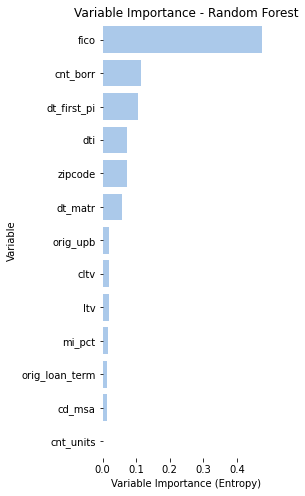

In [118]:
# Plot variable importance
importances = bankloan_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[bankloan_train_noWoE.iloc[:, :-1].columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

In [119]:
from xgboost import XGBClassifier
#Define the classifier.
XGB_Bankloan = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251111952,        # Seed
                            missing=None                  # How are nulls encoded?
                            )

In [121]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [122]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = bankloan_train_noWoE.sample(frac = 0.01,               # The fraction to extract
                                       random_state = 251111952,    # The seed.
                                       )

In [133]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 4,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [124]:
# Train grid search.
GridXGB.fit(val_train.iloc[:, :-1], val_train['Default'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=4,
                                     nthread=None, objective='binary:logistic',
                                     random_state=251111952, reg_alpha=1,
                                     reg_lambda=0, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.632,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
           

In [125]:
GridXGB.best_score_

1.0

In [126]:
GridXGB.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}

In [127]:
GridXGB

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=4,
                                     nthread=None, objective='binary:logistic',
                                     random_state=251111952, reg_alpha=1,
                                     reg_lambda=0, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.632,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
           

In [132]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [5, 25, 50],
                   'max_depth': [1, 2, 3],
                 'learning_rate' : [0.001, 0.005, 0.01]
                  })

In [134]:
# Train grid search.
GridXGB.fit(val_train.iloc[:, :-1], val_train['Default'])

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=4,
                                     nthread=None, objective='binary:logistic',
                                     random_state=251111952, reg_alpha=1,
                                     reg_lambda=0, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.632,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.005, 0.01],
                         'max_depth': [1, 2, 3], 'n_estimators'

In [137]:
# Create XGB with best parameters.
XGB_Bankloan = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20201107,        # Seed
                            missing=None                  # How are nulls encoded?
                            )

In [138]:
# Train over all training data.
XGB_Bankloan.fit(bankloan_train_noWoE.iloc[:, :13], bankloan_train_noWoE['Default'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.001, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=5, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=20201107,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.632, verbosity=1)

In [ ]:
# Plot variable importance
importances = XGB_Bankloan.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[bankloan_train_noWoE.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

In [ ]:
# Calculate probability
XGBClassTest = XGB_Bankloan.predict(bankloan_test_noWoE.iloc[:, :13])
xg_probs_test = XGB_Bankloan.predict_proba(bankloan_test_noWoE.iloc[:, :13])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = bankloan_test_noWoE['Default'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

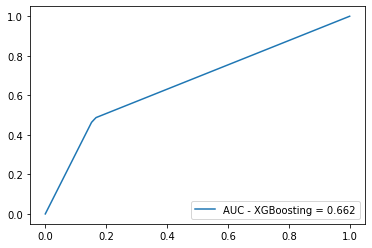

In [142]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankloan_test_noWoE['Default'], 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankloan_test_noWoE['Default'], 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

In [144]:
# Predict probabilities of scorecard.
logreg_probs_test = bankloan_logreg.predict_proba(bankloan_test_WoE.iloc[:, 1:])

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': logreg_probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = bankloan_test_noWoE['Default'], 
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(bankloan_test_WoE['Default'], 
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()